# Deteccion de fraudes en tratamientos medicos

##### Descripcion de las variables
* 1. amount_paid_to_date: Cantidad pagada hasta la fecha (número decimal).
* 2. number_presc_to_date: Número de prescripciones hasta la fecha (número
entero).
* 3. max_presc_to_date: Máximo número de prescripciones hasta la fecha (número
entero).
* 4. max_presc_per_doctor: Máximo número de prescripciones por doctor (número
entero).
* 5. max_presc_per_hospital: Máximo número de prescripciones por hospital
(número entero).
* 6. max_presc_per_year: Máximo número de prescripciones por año (número
entero).
* 7. id: Identificación del registro (número entero).
* 8. FRAUD_LABEL: Indica si el registro es fraudulento (True: Sí, False: No).
* 9. amount_paid_per_year: Cantidad pagada por año (número decimal).
* 10. amount_paid_per_hospital: Cantidad pagada por hospital (número decimal).
* 11. amount_paid_per_doctor: Cantidad pagada por doctor (número decimal).
* 12. amount_paid_to_prescription: Cantidad pagada por prescripción (número
decimal).
* 13. amount_paid_total: Cantidad pagada total (número decimal).
* 14. number_presc_per_year: Número de prescripciones por año (número entero).
* 15. number_presc_per_hospital: Número de prescripciones por hospital (número
entero).
* 16. number_presc_per_doctor: Número de prescripciones por doctor (número
entero).
* 17. number_presc_to_prescription: Número de prescripciones por prescripción
(número entero).
* 18. number_presc_total: Número total de prescripciones (número entero)

#### imports

In [ ]:
import pandas as pd
import time
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.metrics import mean_squared_error, r2_score, classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve


##### Montaje del dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

data = pd.read_excel('/content/drive/MyDrive/Final Seminario/medicaldata.xlsx')

# Carga de los datos
# file_path = 'medicaldata.xlsx'
# data = pd.read_excel(file_path)

Mounted at /content/drive


### Analisis del Data Set


In [ ]:
data.head()

,amount_paid_to_date,number_presc_to_date,max_presc_to_date,max_presc_per_doctor,max_presc_per_hospital,max_presc_per_year,id,FRAUD_LABEL,amount_paid_per_year,amount_paid_per_hospital,amount_paid_per_doctor,amount_paid_to_prescription,amount_paid_total,number_presc_per_year,number_presc_per_hospital,number_presc_per_doctor,number_presc_to_prescription,number_presc_total
0,100.000000,0,1,1,0,0,21,False,109.111328,71.316356,24.658738,40.935309,400.000000,120,37,30,35,400
1,100.588010,9,1,1,9,9,34,False,0.942975,48.316478,27.854219,24.471927,402.352042,285,55,35,46,402
2,100.402561,0,1,1,0,0,35,False,159.592229,53.969161,26.888177,37.658748,401.610244,156,64,21,32,402
3,100.000000,3,1,1,84,9,38,False,59.203803,43.843904,48.933583,19.248757,400.000000,253,27,35,46,400
4,100.000000,22,1,1,22,22,24,False,95.780922,38.195557,43.876891,40.236061,400.000000,206,47,49,46,400


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   amount_paid_to_date           200 non-null    float64
 1   number_presc_to_date          200 non-null    int64  
 2   max_presc_to_date             200 non-null    int64  
 3   max_presc_per_doctor          200 non-null    int64  
 4   max_presc_per_hospital        200 non-null    int64  
 5   max_presc_per_year            200 non-null    int64  
 6   id                            200 non-null    int64  
 7   FRAUD_LABEL                   200 non-null    bool   
 8   amount_paid_per_year          200 non-null    float64
 9   amount_paid_per_hospital      200 non-null    float64
 10  amount_paid_per_doctor        200 non-null    float64
 11  amount_paid_to_prescription   200 non-null    float64
 12  amount_paid_total             200 non-null    float64
 13  numbe

In [ ]:

# Fun para categorizar la variable FRAUD_LABEL
def valueCat(categorie, lEncoders):

    encoder = lEncoders[categorie]


    categories = encoder.classes_
    print('-----------------------------------------')
    for i, category in enumerate(categories):
        encoded_value = encoder.transform([category])[0]
        print(f"Encoded {categorie}: {encoded_value}, Category: {category}")
    print('-----------------------------------------')

encodedCol = ['FRAUD_LABEL']
label_encoders = {}

for col in encodedCol:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

valueCat('FRAUD_LABEL', label_encoders)

-----------------------------------------
Encoded FRAUD_LABEL: 0, Category: False
Encoded FRAUD_LABEL: 1, Category: True
-----------------------------------------


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   amount_paid_to_date           200 non-null    float64
 1   number_presc_to_date          200 non-null    int64  
 2   max_presc_to_date             200 non-null    int64  
 3   max_presc_per_doctor          200 non-null    int64  
 4   max_presc_per_hospital        200 non-null    int64  
 5   max_presc_per_year            200 non-null    int64  
 6   id                            200 non-null    int64  
 7   FRAUD_LABEL                   200 non-null    int64  
 8   amount_paid_per_year          200 non-null    float64
 9   amount_paid_per_hospital      200 non-null    float64
 10  amount_paid_per_doctor        200 non-null    float64
 11  amount_paid_to_prescription   200 non-null    float64
 12  amount_paid_total             200 non-null    float64
 13  numbe

In [ ]:
data.describe()

,amount_paid_to_date,number_presc_to_date,max_presc_to_date,max_presc_per_doctor,max_presc_per_hospital,max_presc_per_year,id,FRAUD_LABEL,amount_paid_per_year,amount_paid_per_hospital,amount_paid_per_doctor,amount_paid_to_prescription,amount_paid_total,number_presc_per_year,number_presc_per_hospital,number_presc_per_doctor,number_presc_to_prescription,number_presc_total
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000
mean,112.517737,14.055000,0.355000,1.040000,42.810000,44.110000,129.68000,0.500000,115.972140,57.186970,37.718318,37.938785,450.070949,219.445000,57.680000,36.74000,38.605000,450.110000
std,25.985798,17.155862,0.490077,0.519373,107.294335,122.500161,99.34083,0.501255,73.613315,18.893880,15.653938,15.376668,103.943193,77.085784,22.097718,13.42174,16.089229,103.937785
min,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.00000,0.000000,0.615264,27.272631,16.866866,17.283348,400.000000,102.000000,25.000000,17.00000,17.000000,400.000000
25%,100.354785,3.000000,0.000000,1.000000,8.000000,8.000000,54.00000,0.000000,57.852834,44.007881,27.296624,28.529379,401.419141,161.500000,42.000000,28.00000,28.000000,401.000000
50%,101.395537,8.000000,0.000000,1.000000,22.000000,19.500000,81.00000,0.500000,122.749636,56.676841,36.082480,36.313056,405.582147,214.500000,55.000000,35.00000,37.000000,405.500000
75%,114.783837,17.000000,1.000000,1.000000,46.000000,45.000000,205.25000,1.000000,171.695147,68.798480,44.978983,45.159348,459.135348,266.500000,69.250000,46.00000,46.000000,459.250000
max,300.000000,82.000000,2.000000,3.000000,1282.000000,1193.000000,341.00000,1.000000,450.835573,148.194790,146.715306,140.601164,1200.000000,495.000000,167.000000,104.00000,143.000000,1200.000000


In [ ]:
data.isnull().sum()

amount_paid_to_date             0
number_presc_to_date            0
max_presc_to_date               0
max_presc_per_doctor            0
max_presc_per_hospital          0
max_presc_per_year              0
id                              0
FRAUD_LABEL                     0
amount_paid_per_year            0
amount_paid_per_hospital        0
amount_paid_per_doctor          0
amount_paid_to_prescription     0
amount_paid_total               0
number_presc_per_year           0
number_presc_per_hospital       0
number_presc_per_doctor         0
number_presc_to_prescription    0
number_presc_total              0
dtype: int64

In [ ]:
data.isna().sum()

amount_paid_to_date             0
number_presc_to_date            0
max_presc_to_date               0
max_presc_per_doctor            0
max_presc_per_hospital          0
max_presc_per_year              0
id                              0
FRAUD_LABEL                     0
amount_paid_per_year            0
amount_paid_per_hospital        0
amount_paid_per_doctor          0
amount_paid_to_prescription     0
amount_paid_total               0
number_presc_per_year           0
number_presc_per_hospital       0
number_presc_per_doctor         0
number_presc_to_prescription    0
number_presc_total              0
dtype: int64

In [ ]:
data['FRAUD_LABEL'].value_counts()

FRAUD_LABEL
0    100
1    100
Name: count, dtype: int64

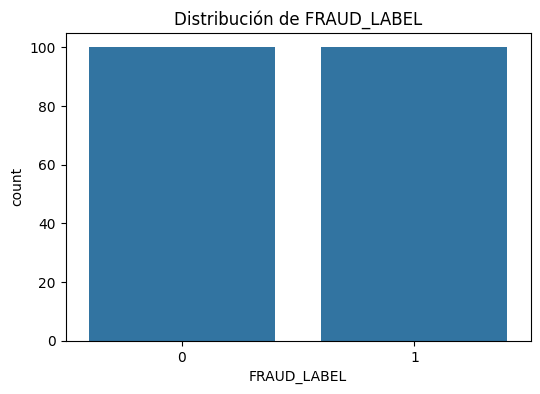

In [ ]:
# Distribucion de la variable objetivo (FRAUD_LABEL)
plt.figure(figsize=(6, 4))
sns.countplot(x='FRAUD_LABEL', data=data)
plt.title('Distribución de FRAUD_LABEL')
plt.show()

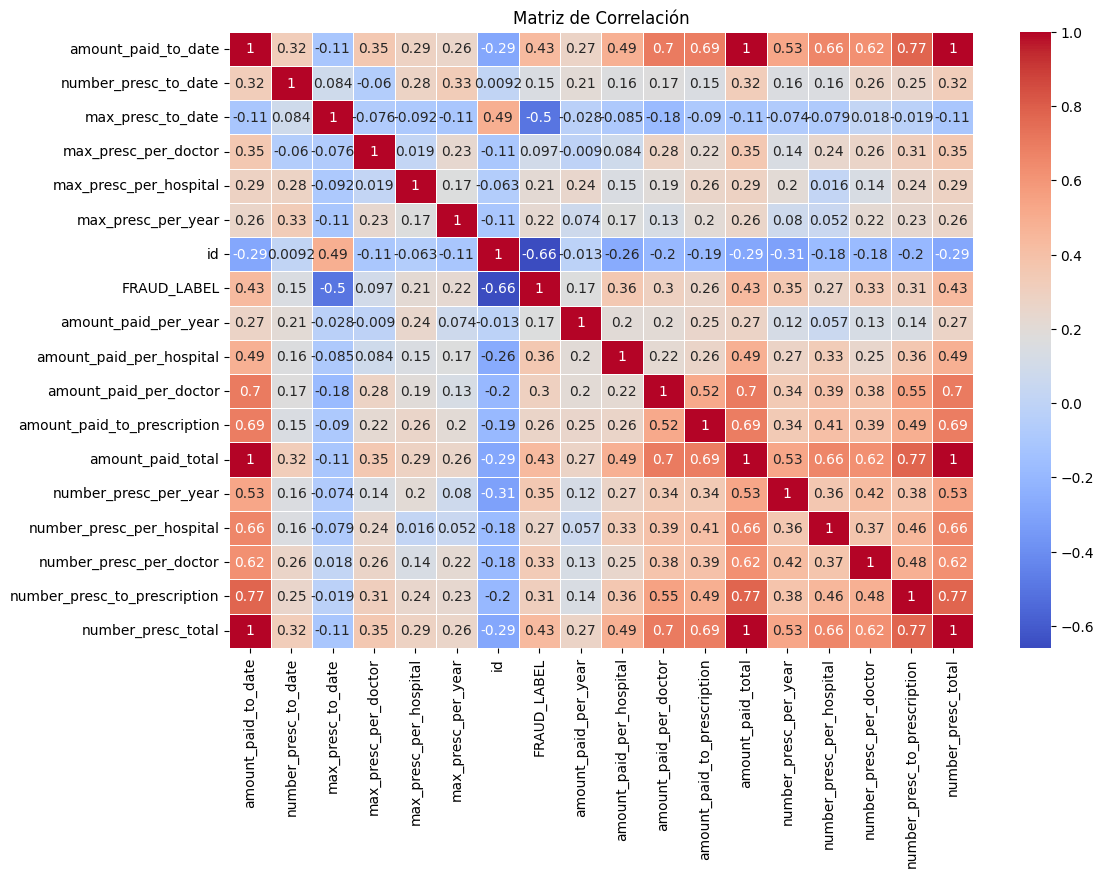

In [ ]:
# Matriz de correlacion
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

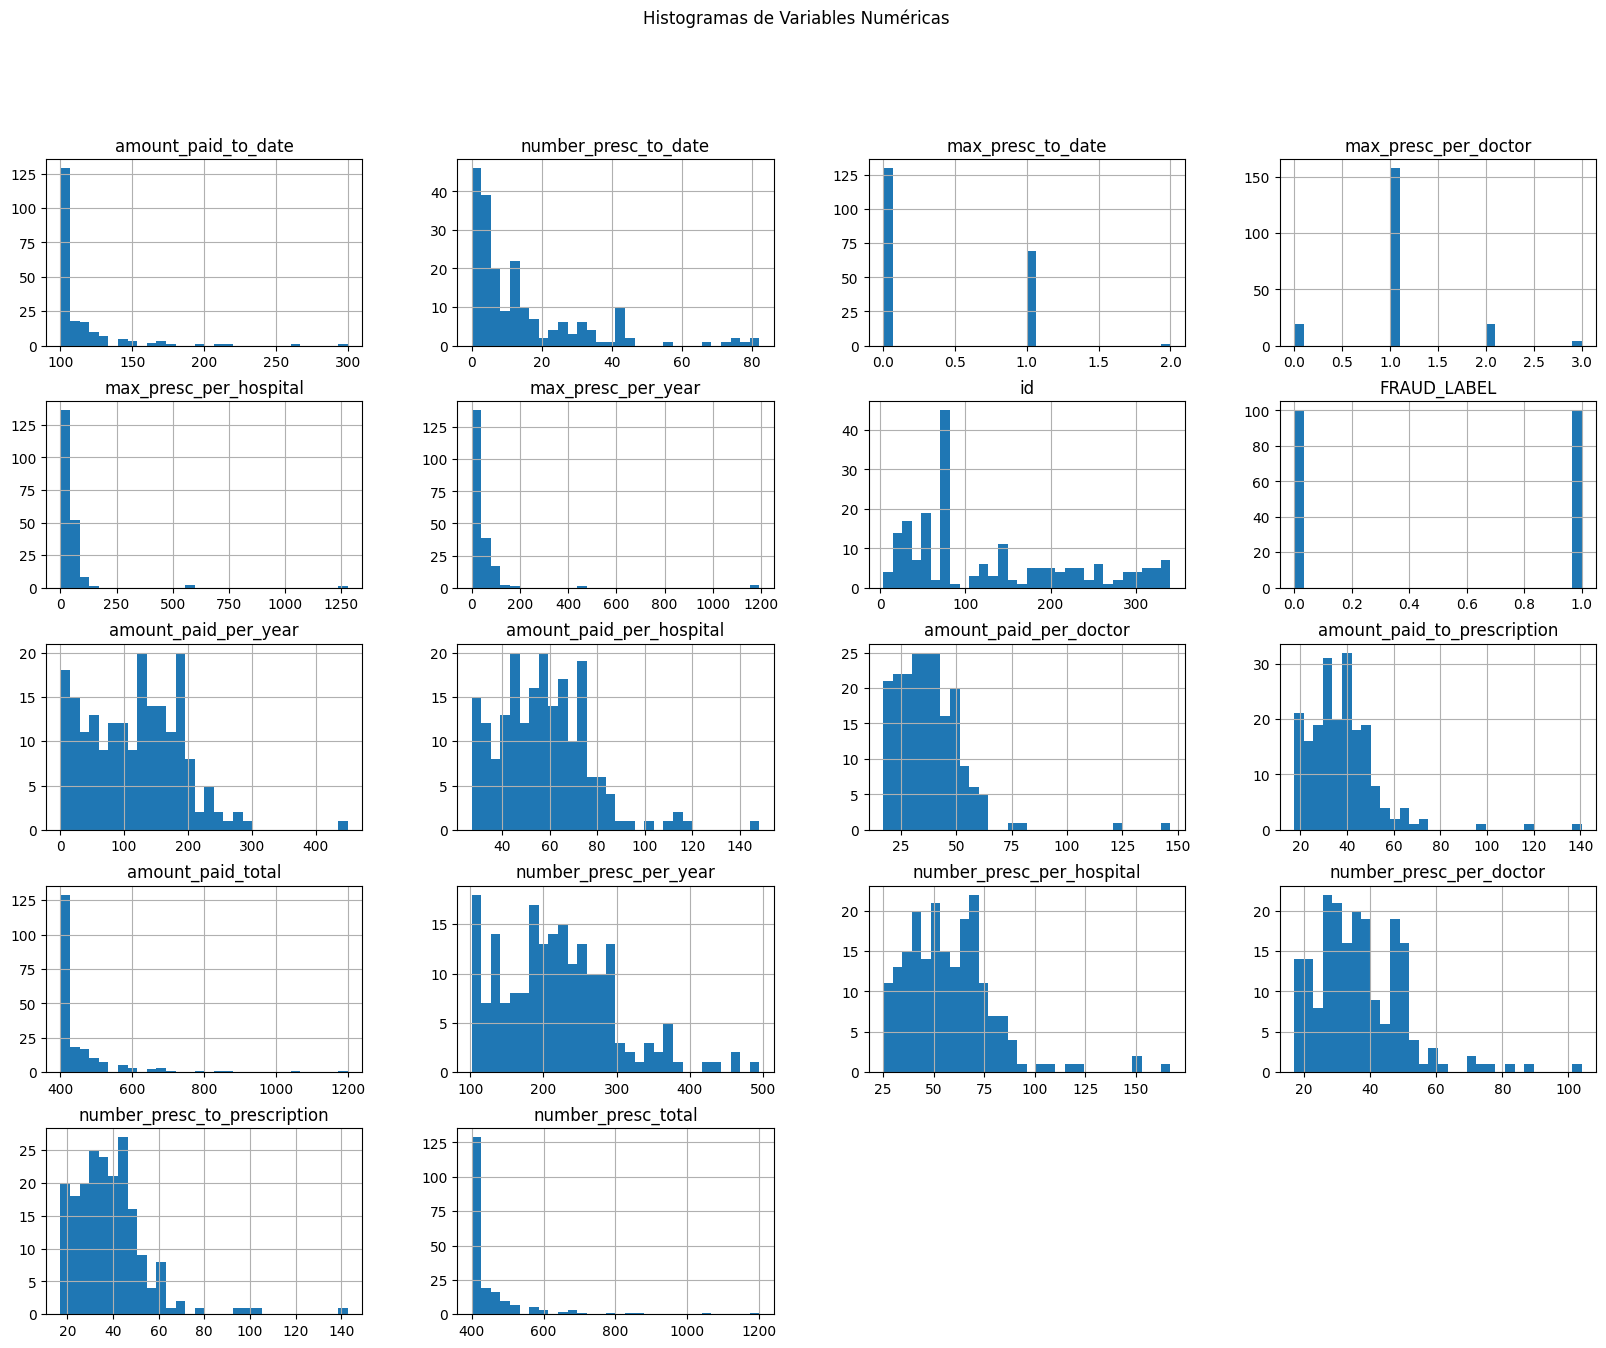

In [ ]:
# Histogramas de variables numericas
data.hist(bins=30, figsize=(20, 15))
plt.suptitle('Histogramas de Variables Numéricas')
plt.show()

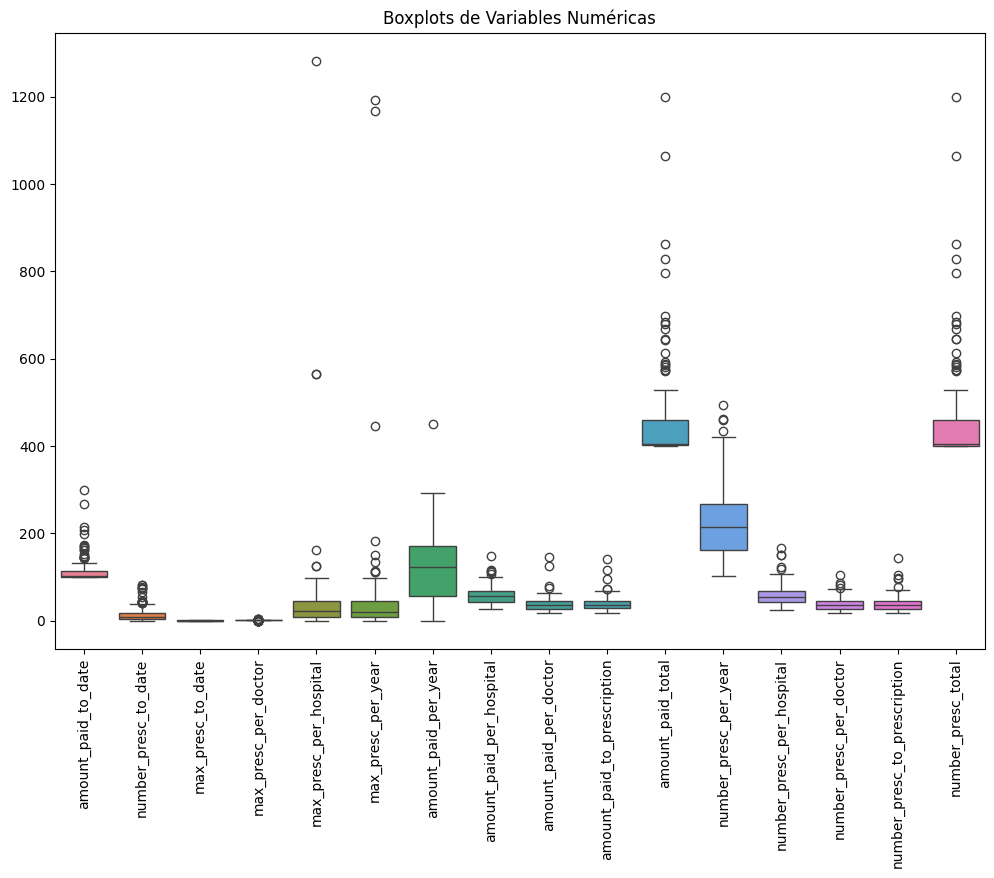

In [ ]:
# Boxplots de las variables numericas
plt.figure(figsize=(12, 8))
sns.boxplot(data=data.drop(columns=['id', 'FRAUD_LABEL']))
plt.title('Boxplots de Variables Numéricas')
plt.xticks(rotation=90)
plt.show()

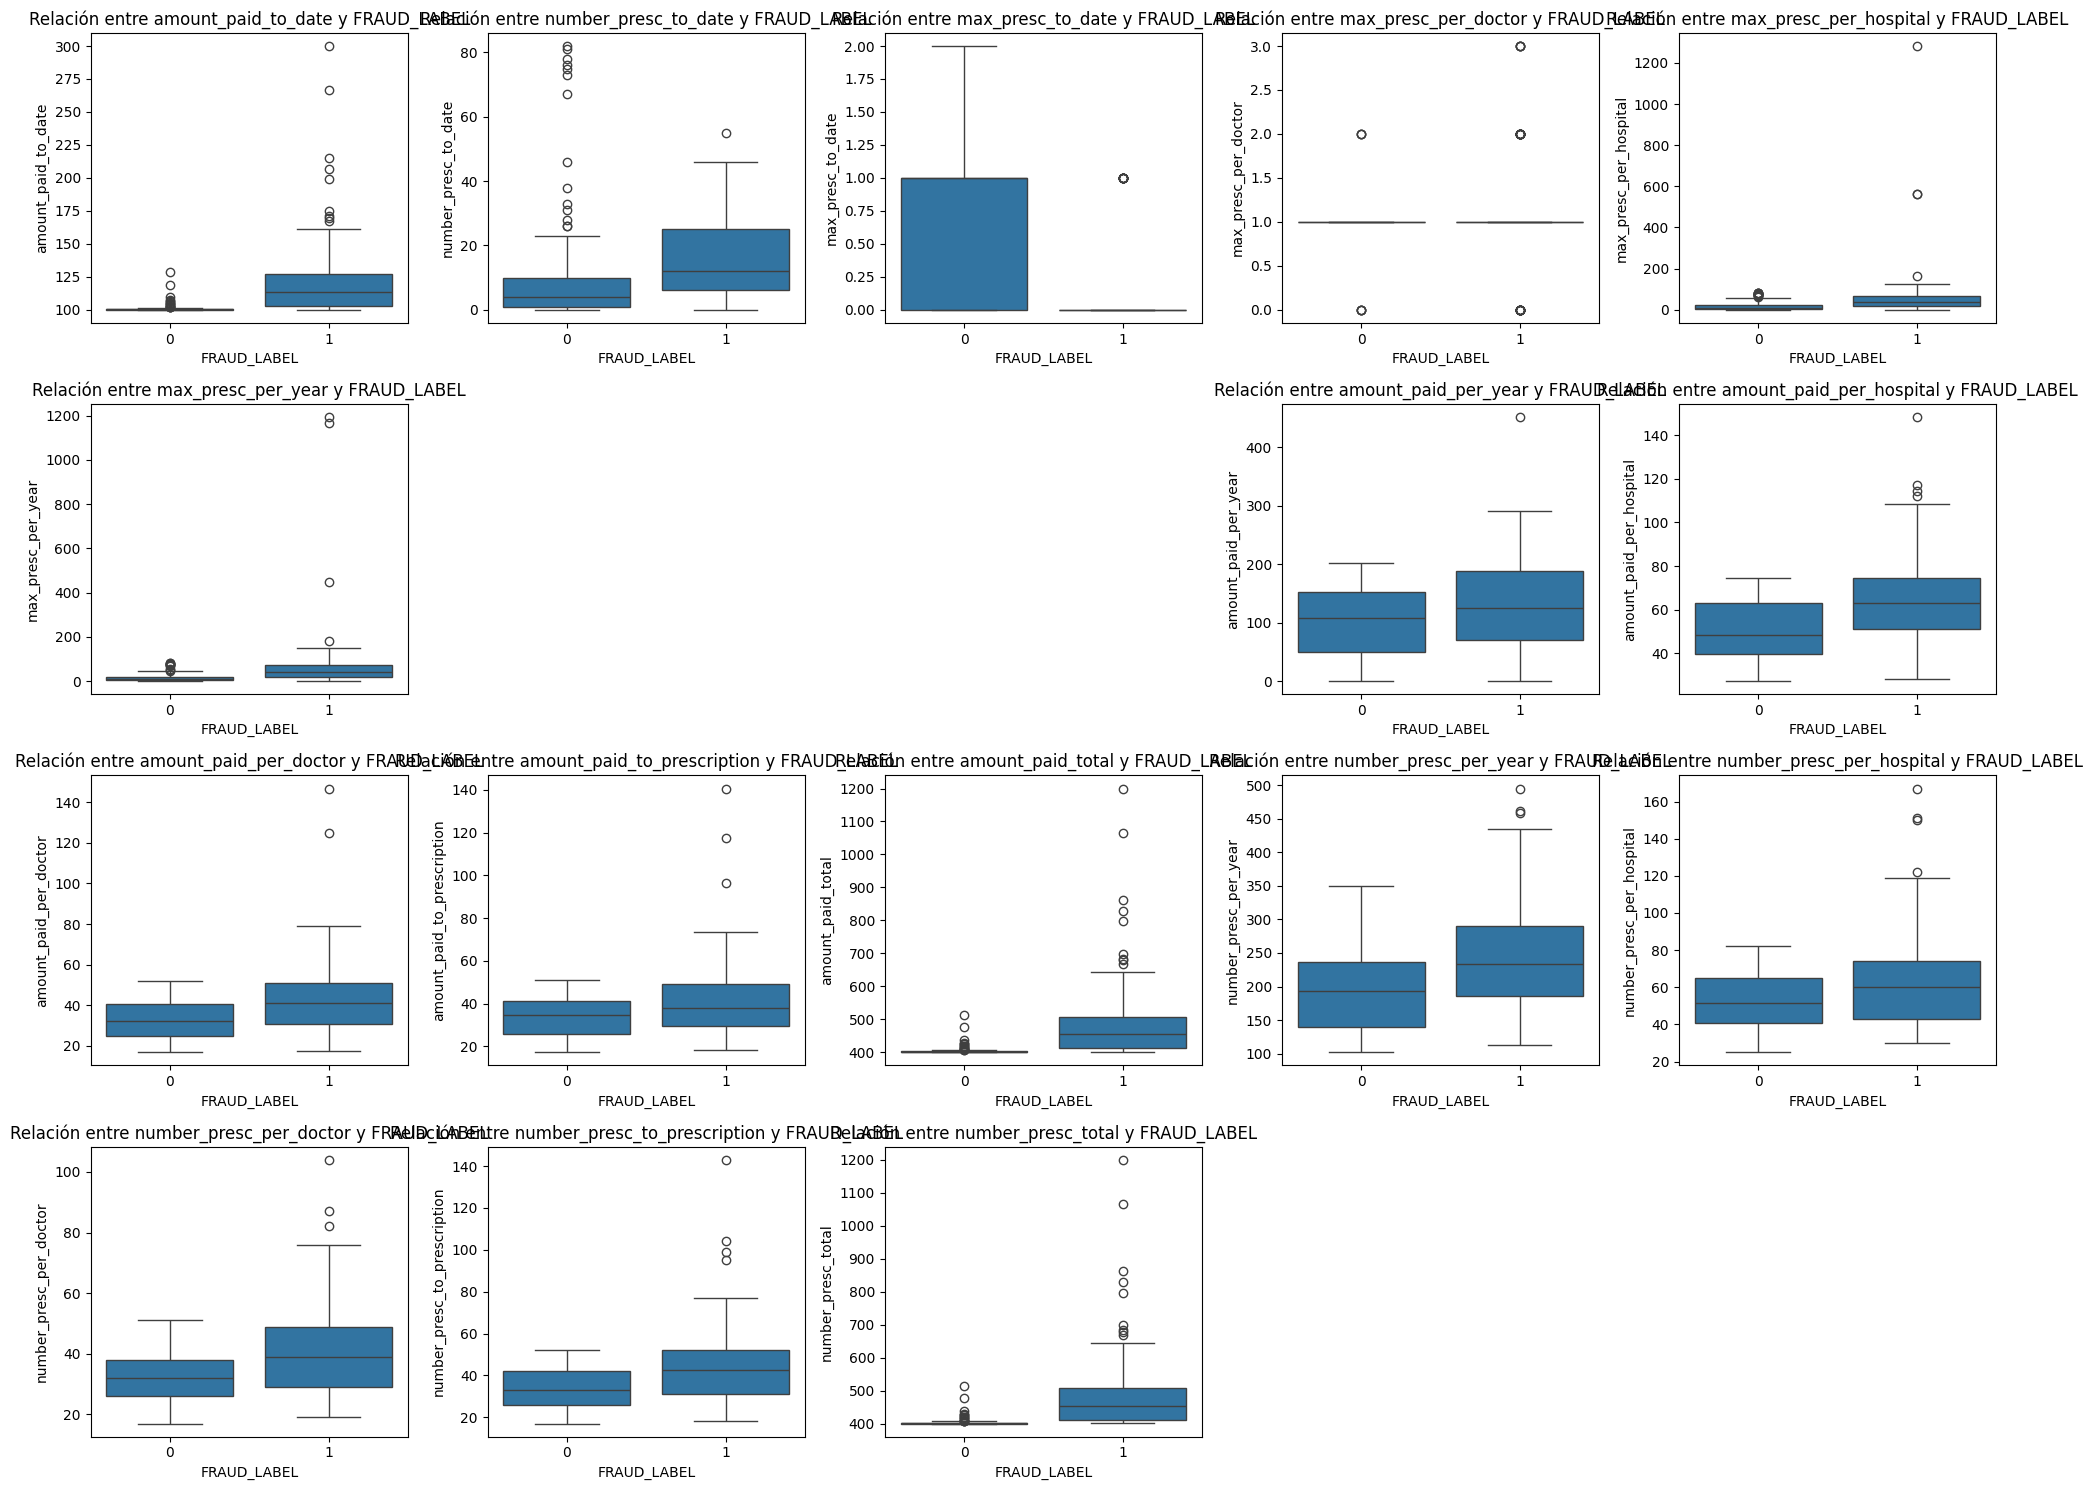

In [ ]:
# Boxplot´s (relacion entre variables numéricas y FRAUD_LABEL)
plt.figure(figsize=(20, 15))
for i, column in enumerate(data.columns):
    if column not in ['id', 'FRAUD_LABEL']:
        plt.subplot(4, 5, i+1)
        sns.boxplot(x='FRAUD_LABEL', y=column, data=data)
        plt.title(f'Relación entre {column} y FRAUD_LABEL')
        plt.tight_layout()
plt.show()

EL PRIMERO


# Primer iteracion

Model: Logistic Regression
Accuracy: 0.75
Classification Report:
{'0': {'precision': 0.7083333333333334, 'recall': 0.85, 'f1-score': 0.7727272727272727, 'support': 20}, '1': {'precision': 0.8125, 'recall': 0.65, 'f1-score': 0.7222222222222223, 'support': 20}, 'accuracy': 0.75, 'macro avg': {'precision': 0.7604166666666667, 'recall': 0.75, 'f1-score': 0.7474747474747475, 'support': 40}, 'weighted avg': {'precision': 0.7604166666666667, 'recall': 0.75, 'f1-score': 0.7474747474747475, 'support': 40}}
Confusion Matrix:
[[17  3]
 [ 7 13]]
AUC-ROC: 0.90
Elapsed Time: 0.29 seconds

------------------------------------------------------------

Model: Decision Tree
Accuracy: 0.825
Classification Report:
{'0': {'precision': 0.8095238095238095, 'recall': 0.85, 'f1-score': 0.8292682926829269, 'support': 20}, '1': {'precision': 0.8421052631578947, 'recall': 0.8, 'f1-score': 0.8205128205128205, 'support': 20}, 'accuracy': 0.825, 'macro avg': {'precision': 0.8258145363408521, 'recall': 0.825, 'f1-sco

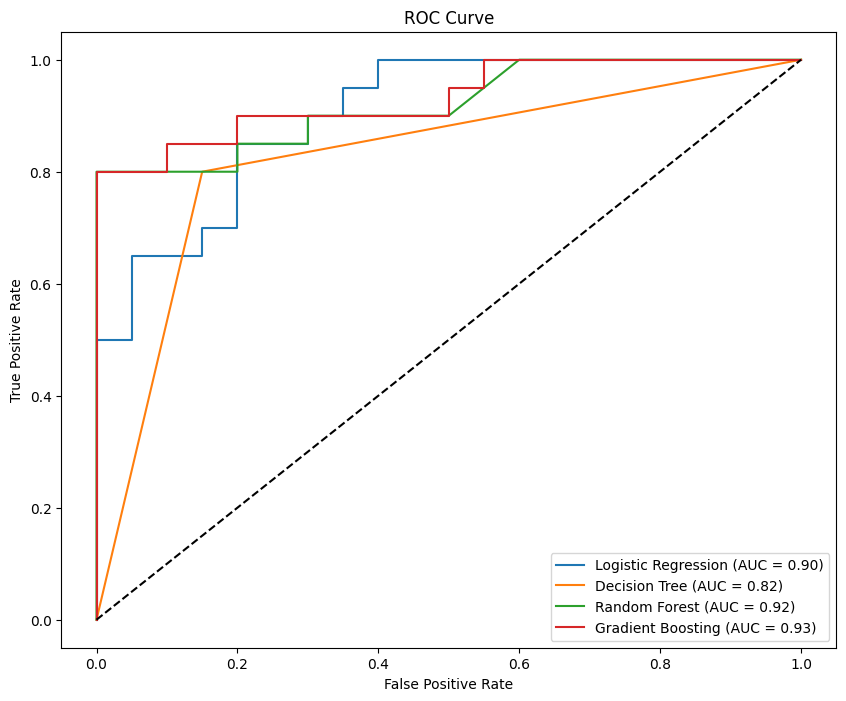

,Model,Accuracy,Precision (Class 0),Recall (Class 0),F1-Score (Class 0),Precision (Class 1),Recall (Class 1),F1-Score (Class 1),AUC-ROC,Elapsed Time (seconds)
0,Logistic Regression,0.750,0.708333,0.85,0.772727,0.812500,0.65,0.722222,0.9025,0.291914
1,Decision Tree,0.825,0.809524,0.85,0.829268,0.842105,0.80,0.820513,0.8250,0.005937
2,Random Forest,0.825,0.809524,0.85,0.829268,0.842105,0.80,0.820513,0.9200,0.211646
3,Gradient Boosting,0.850,0.818182,0.90,0.857143,0.888889,0.80,0.842105,0.9325,0.252526


In [ ]:
# Seleccion de características y variable objetivo
X = data[['amount_paid_to_date', 'number_presc_to_date', 'max_presc_to_date', 'max_presc_per_doctor',
          'max_presc_per_hospital', 'max_presc_per_year', 'amount_paid_per_year',
          'amount_paid_per_hospital', 'amount_paid_per_doctor', 'amount_paid_to_prescription',
          'amount_paid_total', 'number_presc_per_year', 'number_presc_per_hospital',
          'number_presc_per_doctor', 'number_presc_to_prescription', 'number_presc_total']]
y = data['FRAUD_LABEL']

# Division del dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Definicion los modelos
logistic_regression_model = LogisticRegression(max_iter=10000)
decision_tree_model = DecisionTreeClassifier(max_depth=10, random_state=42)
random_forest_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
gradient_boosting_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

# Funcion para entrenar y evaluar modelos
def evaluate_model_with_metrics(model, X_train, y_train, X_test, y_test):
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()

    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Probabilidad para la clase positiva

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    matrix = confusion_matrix(y_test, y_pred)
    elapsed_time = end_time - start_time

    auc = roc_auc_score(y_test, y_prob)

    return accuracy, report, matrix, elapsed_time, auc

# Evaluar los modelos con medición de tiempo y cálculo de AUC-ROC
models = {
    "Logistic Regression": logistic_regression_model,
    "Decision Tree": decision_tree_model,
    "Random Forest": random_forest_model,
    "Gradient Boosting": gradient_boosting_model
}

# Crear una lista para almacenar los resultados
results = []

for name, model in models.items():
    accuracy, report, matrix, elapsed_time, auc = evaluate_model_with_metrics(model, X_train, y_train, X_test, y_test)
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision (Class 0)': report['0']['precision'],
        'Recall (Class 0)': report['0']['recall'],
        'F1-Score (Class 0)': report['0']['f1-score'],
        'Precision (Class 1)': report['1']['precision'],
        'Recall (Class 1)': report['1']['recall'],
        'F1-Score (Class 1)': report['1']['f1-score'],
        'AUC-ROC': auc,
        'Elapsed Time (seconds)': elapsed_time
    })
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy}")
    print("Classification Report:")
    print(report)
    print("Confusion Matrix:")
    print(matrix)
    print(f"AUC-ROC: {auc:.2f}")
    print(f"Elapsed Time: {elapsed_time:.2f} seconds")
    print("\n" + "-"*60 + "\n")

# Convertir los resultados en un DataFrame y mostrarlo
results_df = pd.DataFrame(results)


# Gráfica ROC
plt.figure(figsize=(10, 8))
for name, model in models.items():
    model.fit(X_train, y_train)
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, y_prob):.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

results_df

# Segunda iteracion

Matriz de Confusión (Decision Tree):
[[28  2]
 [ 5 25]]

Reporte de Clasificación (Decision Tree):
              precision    recall  f1-score   support

           0       0.85      0.93      0.89        30
           1       0.93      0.83      0.88        30

    accuracy                           0.88        60
   macro avg       0.89      0.88      0.88        60
weighted avg       0.89      0.88      0.88        60


Precisión del modelo (Decision Tree):
0.8833333333333333

Importancia de las Variables (Decision Tree):
                         Feature  Importance
0            amount_paid_to_date    0.586912
5             max_presc_per_year    0.087245
6           amount_paid_per_year    0.077143
1           number_presc_to_date    0.072803
4         max_presc_per_hospital    0.047483
7       amount_paid_per_hospital    0.029323
10             amount_paid_total    0.027709
13       number_presc_per_doctor    0.025463
8         amount_paid_per_doctor    0.021429
15            numbe

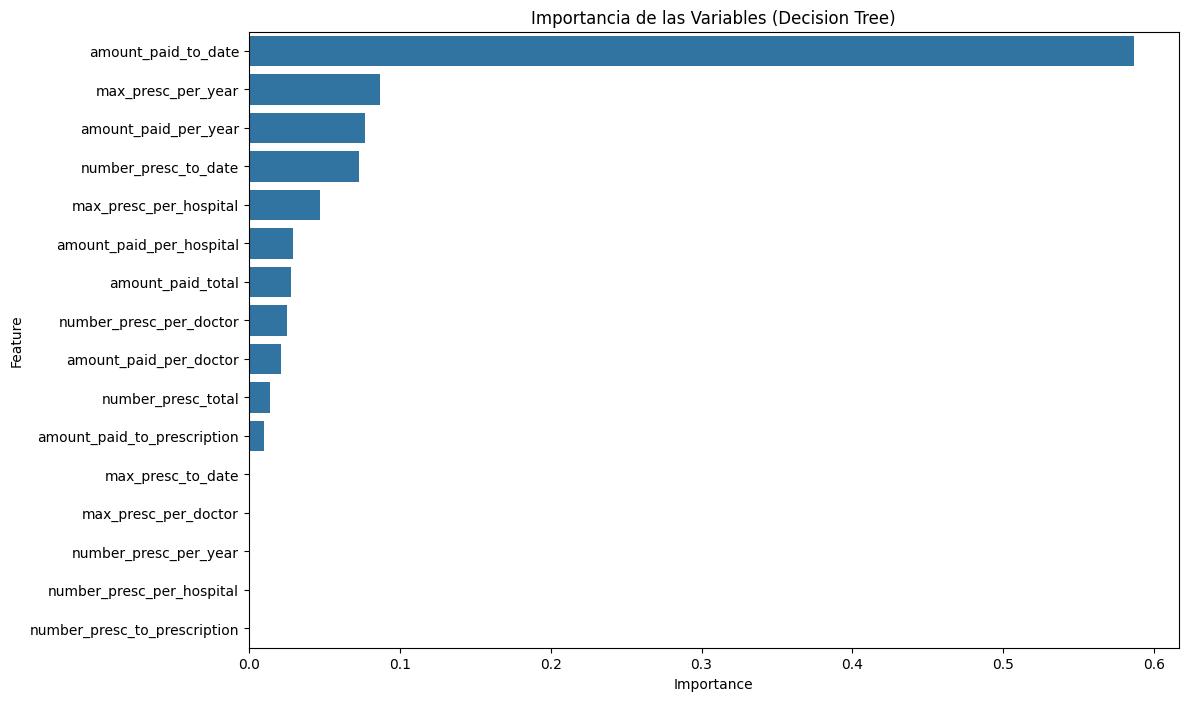

Matriz de Confusión (Random Forest):
[[28  2]
 [ 5 25]]

Reporte de Clasificación (Random Forest):
              precision    recall  f1-score   support

           0       0.85      0.93      0.89        30
           1       0.93      0.83      0.88        30

    accuracy                           0.88        60
   macro avg       0.89      0.88      0.88        60
weighted avg       0.89      0.88      0.88        60


Precisión del modelo (Random Forest):
0.8833333333333333

Importancia de las Variables (Random Forest):
                         Feature  Importance
10             amount_paid_total    0.230420
0            amount_paid_to_date    0.174461
15            number_presc_total    0.143934
5             max_presc_per_year    0.053816
1           number_presc_to_date    0.053759
4         max_presc_per_hospital    0.045748
7       amount_paid_per_hospital    0.035019
11         number_presc_per_year    0.034515
2              max_presc_to_date    0.032749
14  number_presc_to

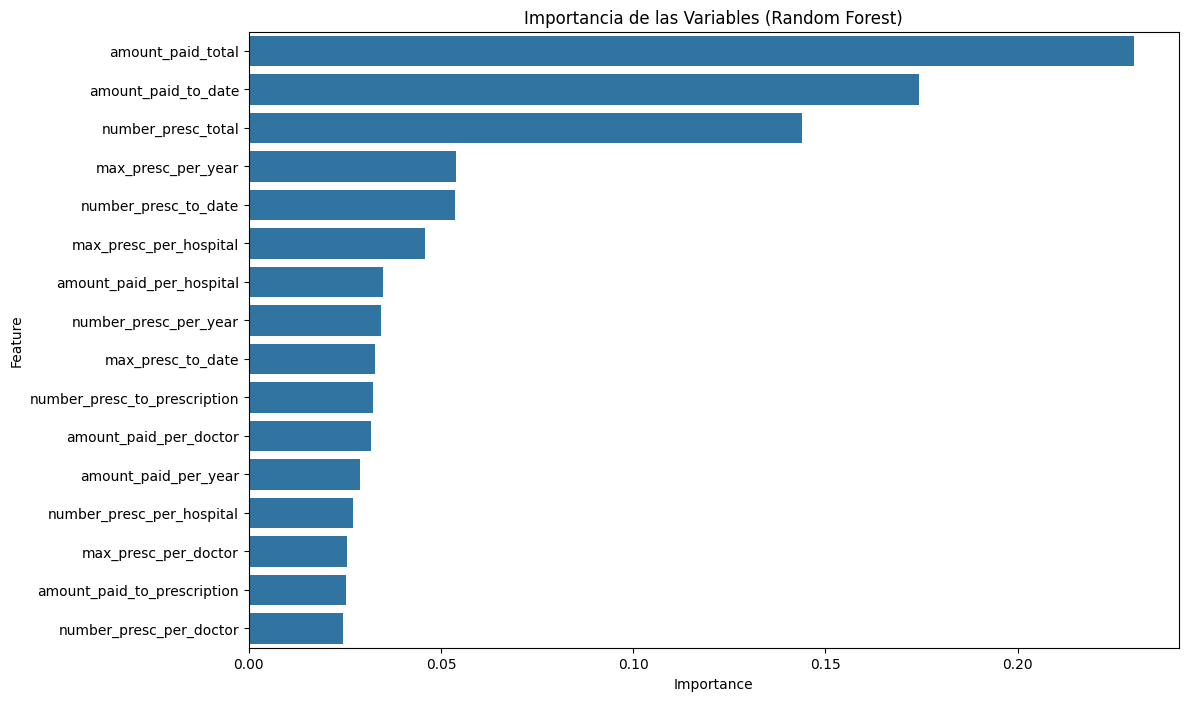

Matriz de Confusión (Gradient Boosting):
[[29  1]
 [ 4 26]]

Reporte de Clasificación (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.88      0.97      0.92        30
           1       0.96      0.87      0.91        30

    accuracy                           0.92        60
   macro avg       0.92      0.92      0.92        60
weighted avg       0.92      0.92      0.92        60


Precisión del modelo (Gradient Boosting):
0.9166666666666666

Importancia de las Variables (Gradient Boosting):
                         Feature  Importance
0            amount_paid_to_date    0.298010
10             amount_paid_total    0.200343
15            number_presc_total    0.146629
1           number_presc_to_date    0.072578
3           max_presc_per_doctor    0.047428
5             max_presc_per_year    0.045085
11         number_presc_per_year    0.034581
4         max_presc_per_hospital    0.026331
6           amount_paid_per_year    0.024444
7  

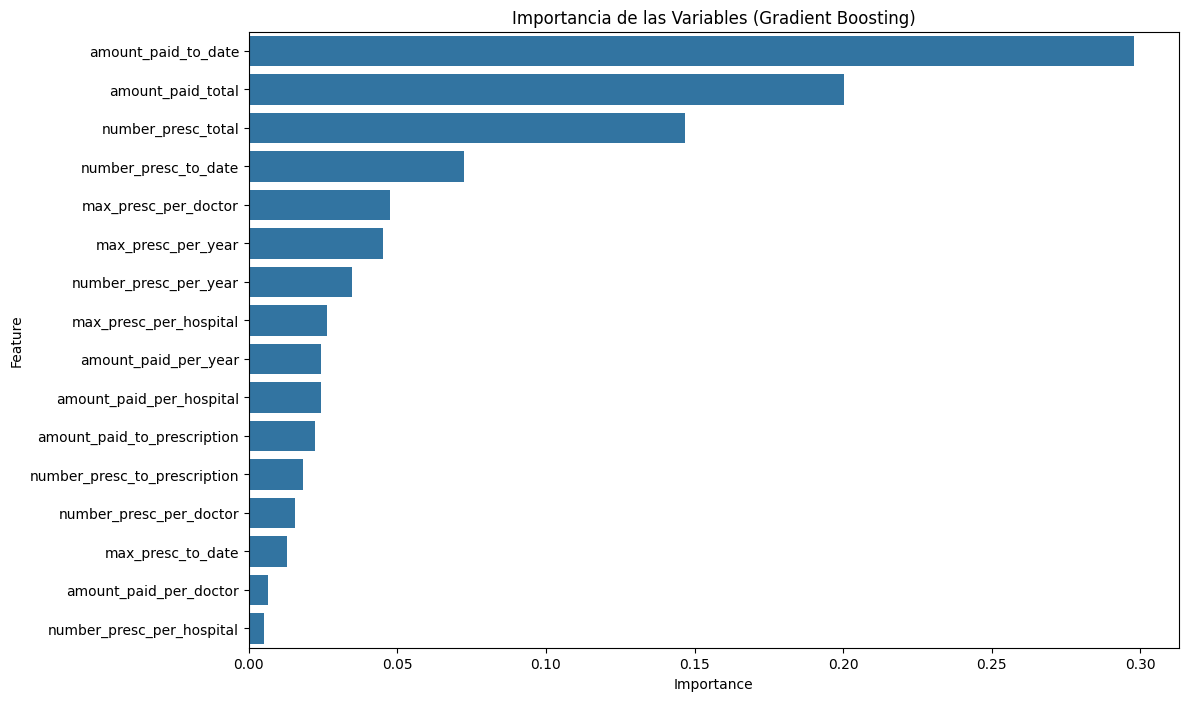

Matriz de Confusión (Stochastic Gradient Boosting):
[[26  4]
 [ 5 25]]

Reporte de Clasificación (Stochastic Gradient Boosting):
              precision    recall  f1-score   support

           0       0.84      0.87      0.85        30
           1       0.86      0.83      0.85        30

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.85      0.85      0.85        60


Precisión del modelo (Stochastic Gradient Boosting):
0.85

Importancia de las Variables (Stochastic Gradient Boosting):
                         Feature  Importance
10             amount_paid_total    0.301162
0            amount_paid_to_date    0.142457
15            number_presc_total    0.057948
14  number_presc_to_prescription    0.056899
6           amount_paid_per_year    0.055711
1           number_presc_to_date    0.052392
7       amount_paid_per_hospital    0.048202
11         number_presc_per_year    0.044703
4         max_pres

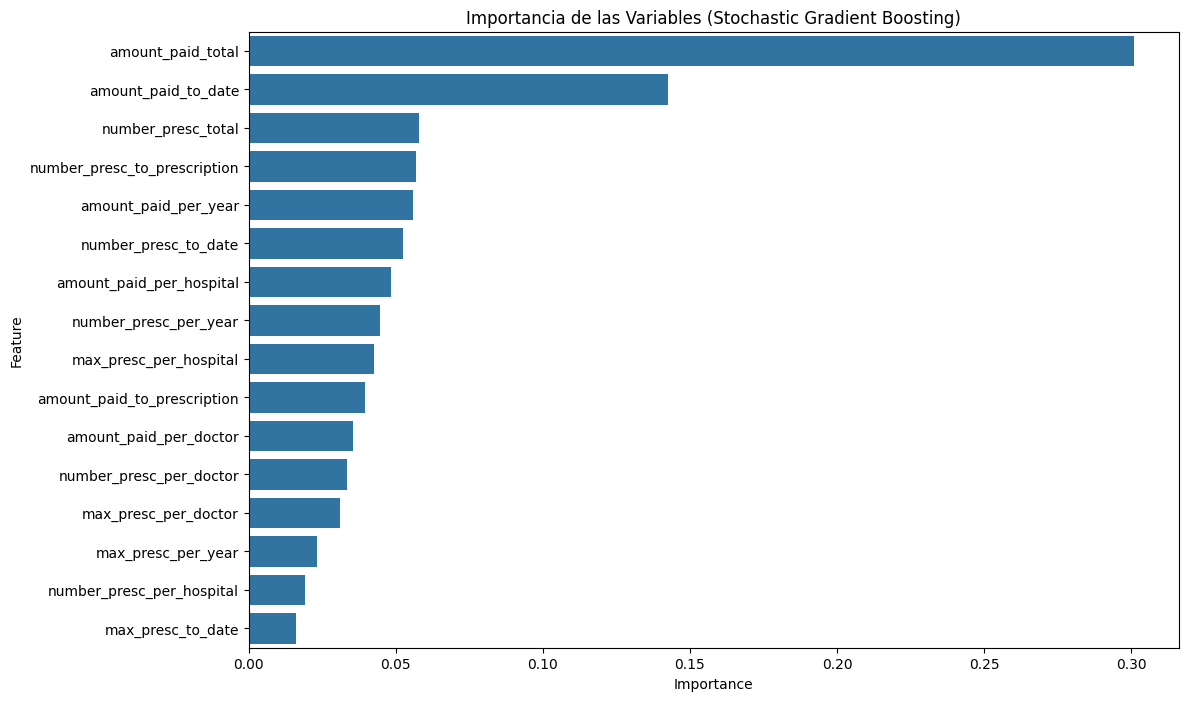

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Matriz de Confusión (Logistic Regression):
[[28  2]
 [ 9 21]]

Reporte de Clasificación (Logistic Regression):
              precision    recall  f1-score   support

           0       0.76      0.93      0.84        30
           1       0.91      0.70      0.79        30

    accuracy                           0.82        60
   macro avg       0.83      0.82      0.81        60
weighted avg       0.83      0.82      0.81        60


Precisión del modelo (Logistic Regression):
0.8166666666666667

Importancia de las Variables (Logistic Regression):
                         Feature  Importance
10             amount_paid_total    0.557499
0            amount_paid_to_date    0.139375
13       number_presc_per_doctor    0.053487
5             max_presc_per_year    0.026123
7       amount_paid_per_hospital    0.018481
6           amount_paid_per_year    0.006699
4         max_presc_per_hospital    0.006227
11         number_presc_per_year    0.004853
12     number_presc_per_hospital   -0.00

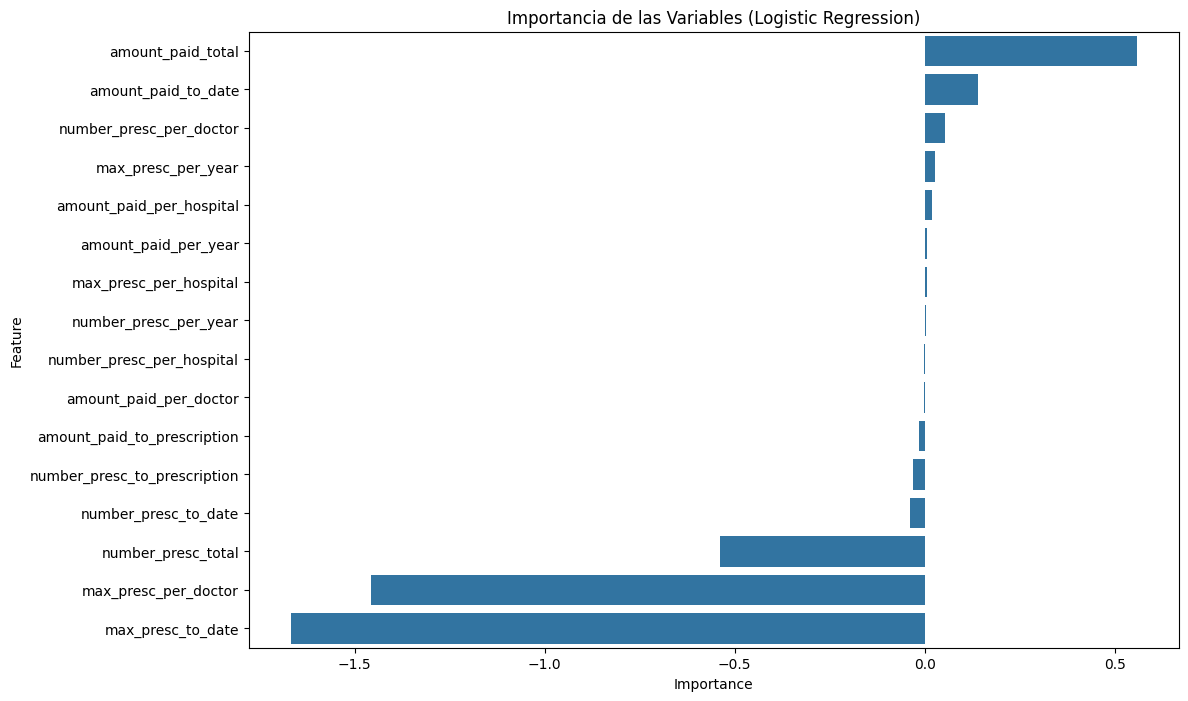

In [ ]:
# Seleccion de características y variable objetivo
X = data.drop(['id', 'FRAUD_LABEL'], axis=1)
y = data['FRAUD_LABEL']

# Division del dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Definir una función para entrenar modelos, predecir, evaluar y mostrar la importancia de las variables
def evaluate_model(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluación del modelo
    print(f"Matriz de Confusión ({model_name}):")
    print(confusion_matrix(y_test, y_pred))
    print(f"\nReporte de Clasificación ({model_name}):")
    print(classification_report(y_test, y_pred))
    print(f"\nPrecisión del modelo ({model_name}):")
    print(accuracy_score(y_test, y_pred))

    # Importancia de las variables
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
    elif hasattr(model, 'coef_'):
        importances = model.coef_[0]
    importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)

    print(f"\nImportancia de las Variables ({model_name}):")
    print(importance_df)

    # Visualización de la importancia de las variables
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=importance_df)
    plt.title(f'Importancia de las Variables ({model_name})')
    plt.show()

# Entrenar y evaluar cada modelo
evaluate_model(DecisionTreeClassifier(random_state=42), "Decision Tree")
evaluate_model(RandomForestClassifier(random_state=42), "Random Forest")
evaluate_model(GradientBoostingClassifier(random_state=42), "Gradient Boosting")
evaluate_model(GradientBoostingClassifier(random_state=42, subsample=0.5), "Stochastic Gradient Boosting")

# Para Logistic Regression, que no tiene feature_importances_, usamos coef_
evaluate_model(LogisticRegression(random_state=42, max_iter=1000), "Logistic Regression")

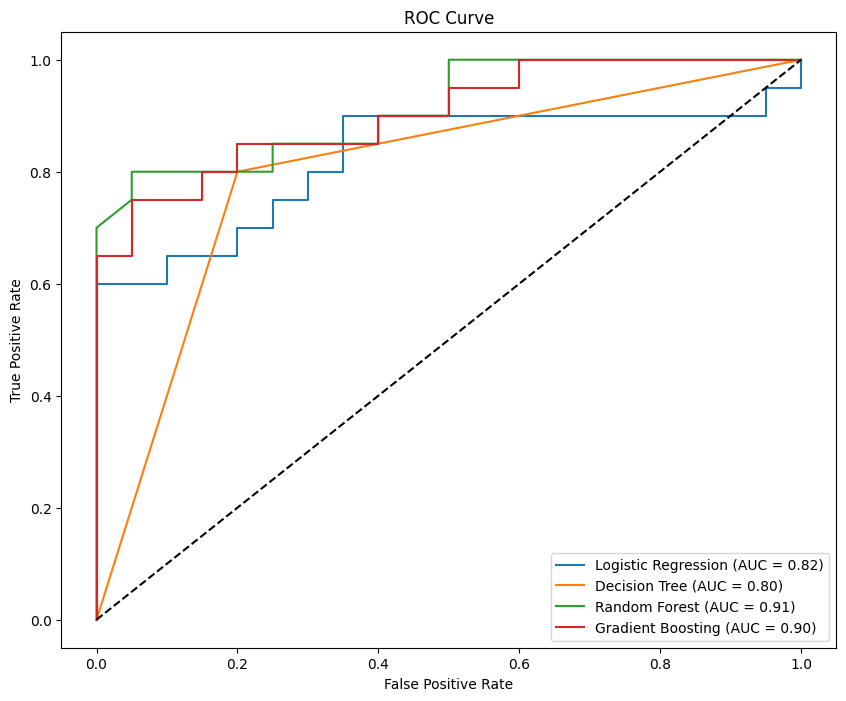

,Model,Accuracy,Precision (Class 0),Recall (Class 0),F1-Score (Class 0),Precision (Class 1),Recall (Class 1),F1-Score (Class 1),AUC-ROC,Elapsed Time (seconds)
0,Logistic Regression,0.750,0.708333,0.85,0.772727,0.812500,0.65,0.722222,0.82500,0.087949
1,Decision Tree,0.800,0.800000,0.80,0.800000,0.800000,0.80,0.800000,0.80000,0.004014
2,Random Forest,0.825,0.809524,0.85,0.829268,0.842105,0.80,0.820513,0.91375,0.251270
3,Gradient Boosting,0.825,0.842105,0.80,0.820513,0.809524,0.85,0.829268,0.90250,0.236568


In [ ]:
# Seleccion de caracteristicas y variable objetivo
X = data[['amount_paid_to_date', 'number_presc_to_date', 'max_presc_per_doctor',
          'max_presc_per_hospital', 'max_presc_per_year', 'amount_paid_per_year',
          'amount_paid_per_hospital', 'amount_paid_per_doctor', 'amount_paid_to_prescription',
          'amount_paid_total', 'number_presc_total']]
y = data['FRAUD_LABEL']

# Division del dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Definir los modelos
logistic_regression_model = LogisticRegression(max_iter=10000)
decision_tree_model = DecisionTreeClassifier(max_depth=10, random_state=42)
random_forest_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
gradient_boosting_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

# Funcion para entrenar y evaluar modelos con medición de tiempo y cálculo de AUC-ROC
def evaluate_model_with_metrics(model, X_train, y_train, X_test, y_test):
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()

    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    matrix = confusion_matrix(y_test, y_pred)
    elapsed_time = end_time - start_time

    auc = roc_auc_score(y_test, y_prob)

    return accuracy, report, matrix, elapsed_time, auc

# Evaluar los modelos con medición de tiempo y calculo de AUC-ROC
models = {
    "Logistic Regression": logistic_regression_model,
    "Decision Tree": decision_tree_model,
    "Random Forest": random_forest_model,
    "Gradient Boosting": gradient_boosting_model
}

# Crear una lista para almacenar los resultados
results = []

for name, model in models.items():
    accuracy, report, matrix, elapsed_time, auc = evaluate_model_with_metrics(model, X_train, y_train, X_test, y_test)
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision (Class 0)': report['0']['precision'],
        'Recall (Class 0)': report['0']['recall'],
        'F1-Score (Class 0)': report['0']['f1-score'],
        'Precision (Class 1)': report['1']['precision'],
        'Recall (Class 1)': report['1']['recall'],
        'F1-Score (Class 1)': report['1']['f1-score'],
        'AUC-ROC': auc,
        'Elapsed Time (seconds)': elapsed_time
    })


results_df = pd.DataFrame(results)



results_df.to_excel("model_comparison_results.xlsx", index=False)

# Gráfica ROC
plt.figure(figsize=(10, 8))
for name, model in models.items():
    model.fit(X_train, y_train)
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, y_prob):.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

results_df

Como podemos ver el mejor modelo para estos datos (Gradient Boosting) empeora notablemente al eliminar las 5 variables con importance de 0, como asi tambien para los demas modelos, incluyendo Decision Tree que es el modelo utilizado para el Feature Selection

# Tercera iteracion
### Agregando Stacking Classifier

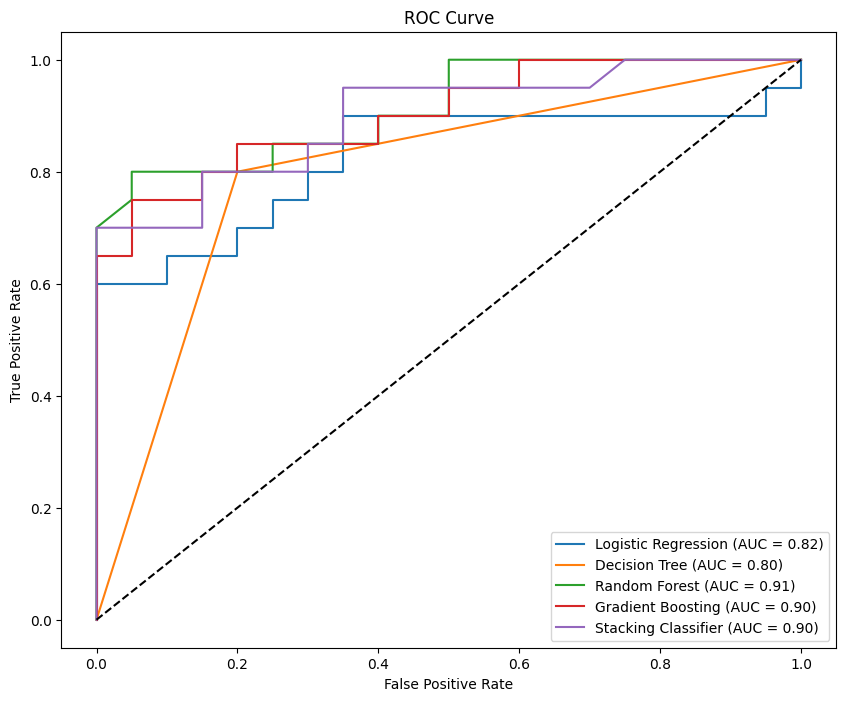

,Model,Accuracy,Precision (Class 0),Recall (Class 0),F1-Score (Class 0),Precision (Class 1),Recall (Class 1),F1-Score (Class 1),AUC-ROC,Elapsed Time (seconds)
0,Logistic Regression,0.750,0.708333,0.85,0.772727,0.812500,0.65,0.722222,0.82500,0.055678
1,Decision Tree,0.800,0.800000,0.80,0.800000,0.800000,0.80,0.800000,0.80000,0.003324
2,Random Forest,0.825,0.809524,0.85,0.829268,0.842105,0.80,0.820513,0.91375,0.155442
3,Gradient Boosting,0.825,0.842105,0.80,0.820513,0.809524,0.85,0.829268,0.90250,0.156486
4,Stacking Classifier,0.825,0.809524,0.85,0.829268,0.842105,0.80,0.820513,0.89875,1.425009


In [ ]:
# Seleccion de características y variable objetivo
X = data[['amount_paid_to_date', 'number_presc_to_date', 'max_presc_per_doctor',
          'max_presc_per_hospital', 'max_presc_per_year', 'amount_paid_per_year',
          'amount_paid_per_hospital', 'amount_paid_per_doctor', 'amount_paid_to_prescription',
          'amount_paid_total', 'number_presc_total']]
y = data['FRAUD_LABEL']

# Division del dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Definir los modelos
logistic_regression_model = LogisticRegression(max_iter=10000)
decision_tree_model = DecisionTreeClassifier(max_depth=10, random_state=42)
random_forest_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
gradient_boosting_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
sgd_model = StackingClassifier(estimators=[
    ('lr', LogisticRegression(max_iter=10000)),
    ('dt', DecisionTreeClassifier(max_depth=10, random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42))
], final_estimator=GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42))

# Funcion para entrenar y evaluar modelos con medición de tiempo y cálculo de AUC-ROC
def evaluate_model_with_metrics(model, X_train, y_train, X_test, y_test):
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()

    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    matrix = confusion_matrix(y_test, y_pred)
    elapsed_time = end_time - start_time

    auc = roc_auc_score(y_test, y_prob)

    return accuracy, report, matrix, elapsed_time, auc

# Evaluar los modelos con medición de tiempo y cálculo de AUC-ROC
models = {
    "Logistic Regression": logistic_regression_model,
    "Decision Tree": decision_tree_model,
    "Random Forest": random_forest_model,
    "Gradient Boosting": gradient_boosting_model,
    "Stacking Classifier": sgd_model
}

# Crear una lista para almacenar los resultados
results = []

for name, model in models.items():
    accuracy, report, matrix, elapsed_time, auc = evaluate_model_with_metrics(model, X_train, y_train, X_test, y_test)
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision (Class 0)': report['0']['precision'],
        'Recall (Class 0)': report['0']['recall'],
        'F1-Score (Class 0)': report['0']['f1-score'],
        'Precision (Class 1)': report['1']['precision'],
        'Recall (Class 1)': report['1']['recall'],
        'F1-Score (Class 1)': report['1']['f1-score'],
        'AUC-ROC': auc,
        'Elapsed Time (seconds)': elapsed_time
    })

# Convertir los resultados en un DataFrame y mostrarlo
results_df = pd.DataFrame(results)

# Guardar los resultados en un archivo Excel
results_df.to_excel("model_comparison_results.xlsx", index=False)

# Gráfica ROC
plt.figure(figsize=(10, 8))
for name, model in models.items():
    model.fit(X_train, y_train)
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, y_prob):.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

results_df

### Stochastic Gradient Boosting (usando todas las variables)

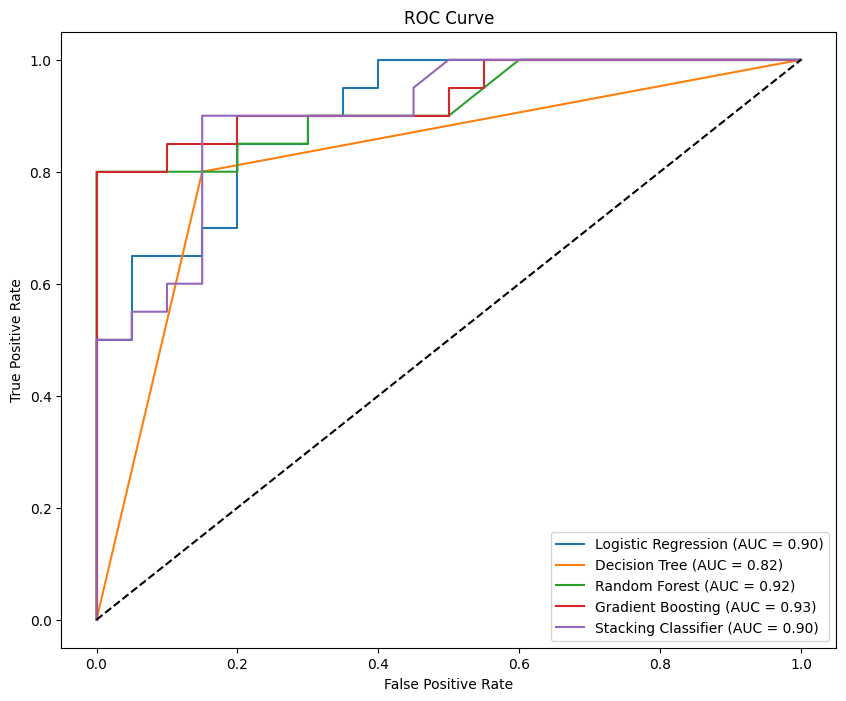

,Model,Accuracy,Precision (Class 0),Recall (Class 0),F1-Score (Class 0),Precision (Class 1),Recall (Class 1),F1-Score (Class 1),AUC-ROC,Elapsed Time (seconds)
0,Logistic Regression,0.750,0.708333,0.85,0.772727,0.812500,0.65,0.722222,0.90250,0.214988
1,Decision Tree,0.825,0.809524,0.85,0.829268,0.842105,0.80,0.820513,0.82500,0.003134
2,Random Forest,0.825,0.809524,0.85,0.829268,0.842105,0.80,0.820513,0.92000,0.152829
3,Gradient Boosting,0.850,0.818182,0.90,0.857143,0.888889,0.80,0.842105,0.93250,0.188243
4,Stacking Classifier,0.850,0.888889,0.80,0.842105,0.818182,0.90,0.857143,0.90125,2.417427


In [ ]:
# Seleccion de caracteristicas y variable objetivo
X = data[['amount_paid_to_date', 'number_presc_to_date', 'max_presc_to_date', 'max_presc_per_doctor',
          'max_presc_per_hospital', 'max_presc_per_year', 'amount_paid_per_year',
          'amount_paid_per_hospital', 'amount_paid_per_doctor', 'amount_paid_to_prescription',
          'amount_paid_total', 'number_presc_per_year', 'number_presc_per_hospital',
          'number_presc_per_doctor', 'number_presc_to_prescription', 'number_presc_total']]
y = data['FRAUD_LABEL']

# Division del dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Definir los modelos
logistic_regression_model = LogisticRegression(max_iter=10000)
decision_tree_model = DecisionTreeClassifier(max_depth=10, random_state=42)
random_forest_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
gradient_boosting_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
sgd_model = StackingClassifier(estimators=[
    ('lr', LogisticRegression(max_iter=10000)),
    ('dt', DecisionTreeClassifier(max_depth=10, random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42))
], final_estimator=GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42))

# Funcion para entrenar y evaluar modelos con medición de tiempo y cálculo de AUC-ROC
def evaluate_model_with_metrics(model, X_train, y_train, X_test, y_test):
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()

    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Probabilidad para la clase positiva

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    matrix = confusion_matrix(y_test, y_pred)
    elapsed_time = end_time - start_time

    auc = roc_auc_score(y_test, y_prob)

    return accuracy, report, matrix, elapsed_time, auc

# Evaluar los modelos con medición de tiempo y cálculo de AUC-ROC
models = {
    "Logistic Regression": logistic_regression_model,
    "Decision Tree": decision_tree_model,
    "Random Forest": random_forest_model,
    "Gradient Boosting": gradient_boosting_model,
    "Stacking Classifier": sgd_model
}

# Crear una lista para almacenar los resultados
results = []

for name, model in models.items():
    accuracy, report, matrix, elapsed_time, auc = evaluate_model_with_metrics(model, X_train, y_train, X_test, y_test)
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision (Class 0)': report['0']['precision'],
        'Recall (Class 0)': report['0']['recall'],
        'F1-Score (Class 0)': report['0']['f1-score'],
        'Precision (Class 1)': report['1']['precision'],
        'Recall (Class 1)': report['1']['recall'],
        'F1-Score (Class 1)': report['1']['f1-score'],
        'AUC-ROC': auc,
        'Elapsed Time (seconds)': elapsed_time
    })

# Convertir los resultados en un DataFrame y mostrarlo
results_df = pd.DataFrame(results)

# Guardar los resultados en un archivo Excel
results_df.to_excel("model_comparison_results.xlsx", index=False)

# Gráfica ROC
plt.figure(figsize=(10, 8))
for name, model in models.items():
    model.fit(X_train, y_train)
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, y_prob):.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

results_df

# Comparacion entre los rendimientos

In [ ]:
# Datos de la primera iteración
data_iter1 = {
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest", "Gradient Boosting"],
    "Accuracy": [0.750, 0.825, 0.825, 0.850],
    "Precision (Class 0)": [0.708333, 0.809524, 0.809524, 0.818182],
    "Recall (Class 0)": [0.85, 0.85, 0.85, 0.90],
    "F1-Score (Class 0)": [0.772727, 0.829268, 0.829268, 0.857143],
    "Precision (Class 1)": [0.812500, 0.842105, 0.842105, 0.888889],
    "Recall (Class 1)": [0.65, 0.80, 0.80, 0.80],
    "F1-Score (Class 1)": [0.722222, 0.820513, 0.820513, 0.842105],
    "AUC-ROC": [0.9025, 0.8250, 0.9200, 0.9325],
    "Elapsed Time (seconds)": [0.165529, 0.001994, 0.103723, 0.216421],
    "Iteration": ["First"] * 4
}

# Datos de la segunda iteración
data_iter2 = {
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest", "Gradient Boosting"],
    "Accuracy": [0.750, 0.800, 0.825, 0.825],
    "Precision (Class 0)": [0.708333, 0.800000, 0.809524, 0.842105],
    "Recall (Class 0)": [0.85, 0.80, 0.85, 0.80],
    "F1-Score (Class 0)": [0.772727, 0.800000, 0.829268, 0.820513],
    "Precision (Class 1)": [0.812500, 0.800000, 0.842105, 0.809524],
    "Recall (Class 1)": [0.65, 0.80, 0.80, 0.85],
    "F1-Score (Class 1)": [0.722222, 0.800000, 0.820513, 0.829268],
    "AUC-ROC": [0.82500, 0.80000, 0.91375, 0.90500],
    "Elapsed Time (seconds)": [0.066821, 0.001995, 0.102257, 0.191247],
    "Iteration": ["Second"] * 4
}

# Datos de la tercera iteración (con variables acotadas)
data_iter3_acotadas = {
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest", "Gradient Boosting", "Stochastic Gradient Boosting"],
    "Accuracy": [0.750, 0.800, 0.825, 0.825, 0.825],
    "Precision (Class 0)": [0.708333, 0.800000, 0.809524, 0.842105, 0.809524],
    "Recall (Class 0)": [0.85, 0.80, 0.85, 0.80, 0.85],
    "F1-Score (Class 0)": [0.772727, 0.800000, 0.829268, 0.820513, 0.829268],
    "Precision (Class 1)": [0.812500, 0.800000, 0.842105, 0.809524, 0.842105],
    "Recall (Class 1)": [0.65, 0.80, 0.80, 0.85, 0.80],
    "F1-Score (Class 1)": [0.722222, 0.800000, 0.820513, 0.829268, 0.820513],
    "AUC-ROC": [0.82500, 0.80000, 0.91375, 0.90500, 0.89875],
    "Elapsed Time (seconds)": [0.073803, 0.003990, 0.101727, 0.196475, 1.127698],
    "Iteration": ["Third (Acotadas)"] * 5
}

# Datos de la tercera iteración (con todas las variables)
data_iter3_todas = {
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest", "Gradient Boosting", "Stochastic Gradient Boosting"],
    "Accuracy": [0.750, 0.825, 0.825, 0.850, 0.875],
    "Precision (Class 0)": [0.708333, 0.809524, 0.809524, 0.818182, 0.894737],
    "Recall (Class 0)": [0.85, 0.85, 0.85, 0.90, 0.85],
    "F1-Score (Class 0)": [0.772727, 0.829268, 0.829268, 0.857143, 0.871795],
    "Precision (Class 1)": [0.812500, 0.842105, 0.842105, 0.888889, 0.857143],
    "Recall (Class 1)": [0.65, 0.80, 0.80, 0.80, 0.90],
    "F1-Score (Class 1)": [0.722222, 0.820513, 0.820513, 0.842105, 0.878049],
    "AUC-ROC": [0.90250, 0.82500, 0.92000, 0.93250, 0.88375],
    "Elapsed Time (seconds)": [0.190482, 0.001994, 0.102745, 0.221184, 2.047475],
    "Iteration": ["Third (Todas)"] * 5
}


df_iter1 = pd.DataFrame(data_iter1)
df_iter2 = pd.DataFrame(data_iter2)
df_iter3_acotadas = pd.DataFrame(data_iter3_acotadas)
df_iter3_todas = pd.DataFrame(data_iter3_todas)


df_comparativo = pd.concat([df_iter1, df_iter2, df_iter3_acotadas, df_iter3_todas], ignore_index=True)


df_comparativo

,Model,Accuracy,Precision (Class 0),Recall (Class 0),F1-Score (Class 0),Precision (Class 1),Recall (Class 1),F1-Score (Class 1),AUC-ROC,Elapsed Time (seconds),Iteration
0,Logistic Regression,0.750,0.708333,0.85,0.772727,0.812500,0.65,0.722222,0.90250,0.165529,First
1,Decision Tree,0.825,0.809524,0.85,0.829268,0.842105,0.80,0.820513,0.82500,0.001994,First
2,Random Forest,0.825,0.809524,0.85,0.829268,0.842105,0.80,0.820513,0.92000,0.103723,First
3,Gradient Boosting,0.850,0.818182,0.90,0.857143,0.888889,0.80,0.842105,0.93250,0.216421,First
4,Logistic Regression,0.750,0.708333,0.85,0.772727,0.812500,0.65,0.722222,0.82500,0.066821,Second
5,Decision Tree,0.800,0.800000,0.80,0.800000,0.800000,0.80,0.800000,0.80000,0.001995,Second
6,Random Forest,0.825,0.809524,0.85,0.829268,0.842105,0.80,0.820513,0.91375,0.102257,Second
7,Gradient Boosting,0.825,0.842105,0.80,0.820513,0.809524,0.85,0.829268,0.90500,0.191247,Second
8,Logistic Regression,0.750,0.708333,0.85,0.772727,0.812500,0.65,0.722222,0.82500,0.073803,Third (Acotadas)
9,Decision Tree,0.800,0.800000,0.80,0.800000,0.800000,0.80,0.800000,0.80000,0.003990,Third (Acotadas)


## Dandole color a las medidas de mas importancia (Accuracy y AUC-ROC)

In [ ]:

df_comparativo = pd.DataFrame({
    "Iteration": ["First"] * 4 + ["Second"] * 4 + ["Third (Acotadas)"] * 5 + ["Third (Todas)"] * 5,
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest", "Gradient Boosting",
              "Logistic Regression", "Decision Tree", "Random Forest", "Gradient Boosting",
              "Logistic Regression", "Decision Tree", "Random Forest", "Gradient Boosting", "Stochastic Gradient Boosting",
              "Logistic Regression", "Decision Tree", "Random Forest", "Gradient Boosting", "Stochastic Gradient Boosting"],
    "Accuracy": [0.750, 0.825, 0.825, 0.850,
                 0.750, 0.800, 0.825, 0.825,
                 0.750, 0.800, 0.825, 0.825, 0.825,
                 0.750, 0.825, 0.825, 0.850, 0.875],
    "Precision (Class 0)": [0.708333, 0.809524, 0.809524, 0.818182,
                            0.708333, 0.800000, 0.809524, 0.842105,
                            0.708333, 0.800000, 0.809524, 0.842105, 0.809524,
                            0.708333, 0.809524, 0.809524, 0.818182, 0.894737],
    "Recall (Class 0)": [0.85, 0.85, 0.85, 0.90,
                         0.85, 0.80, 0.85, 0.80,
                         0.85, 0.80, 0.85, 0.80, 0.85,
                         0.85, 0.85, 0.85, 0.90, 0.85],
    "F1-Score (Class 0)": [0.772727, 0.829268, 0.829268, 0.857143,
                           0.772727, 0.800000, 0.829268, 0.820513,
                           0.772727, 0.800000, 0.829268, 0.820513, 0.829268,
                           0.772727, 0.829268, 0.829268, 0.857143, 0.871795],
    "Precision (Class 1)": [0.812500, 0.842105, 0.842105, 0.888889,
                            0.812500, 0.800000, 0.842105, 0.809524,
                            0.812500, 0.800000, 0.842105, 0.809524, 0.842105,
                            0.812500, 0.842105, 0.842105, 0.888889, 0.857143],
    "Recall (Class 1)": [0.65, 0.80, 0.80, 0.80,
                         0.65, 0.80, 0.80, 0.85,
                         0.65, 0.80, 0.80, 0.85, 0.80,
                         0.65, 0.80, 0.80, 0.80, 0.90],
    "F1-Score (Class 1)": [0.722222, 0.820513, 0.820513, 0.842105,
                           0.722222, 0.800000, 0.820513, 0.829268,
                           0.722222, 0.800000, 0.820513, 0.829268, 0.820513,
                           0.722222, 0.820513, 0.820513, 0.842105, 0.878049],
    "AUC-ROC": [0.90250, 0.82500, 0.92000, 0.93250,
                0.82500, 0.80000, 0.91375, 0.90500,
                0.82500, 0.80000, 0.91375, 0.90500, 0.89875,
                0.90250, 0.82500, 0.92000, 0.93250, 0.88375],
    "Elapsed Time (seconds)": [0.165529, 0.001994, 0.103723, 0.216421,
                               0.066821, 0.001995, 0.102257, 0.191247,
                               0.073803, 0.003990, 0.101727, 0.196475, 1.127698,
                               0.190482, 0.001994, 0.102745, 0.221184, 2.047475]
})


styled_df = df_comparativo.style.set_caption("Comparative Results of Model Iterations").format({
    "Accuracy": "{:.3f}",
    "Precision (Class 0)": "{:.6f}",
    "Recall (Class 0)": "{:.2f}",
    "F1-Score (Class 0)": "{:.6f}",
    "Precision (Class 1)": "{:.6f}",
    "Recall (Class 1)": "{:.2f}",
    "F1-Score (Class 1)": "{:.6f}",
    "AUC-ROC": "{:.5f}",
    "Elapsed Time (seconds)": "{:.6f}"
}).background_gradient(subset=["Accuracy", "AUC-ROC"], cmap="viridis")


styled_df.to_excel("comparative_results_model_iterations.xlsx", engine='openpyxl')


styled_df

,Iteration,Model,Accuracy,Precision (Class 0),Recall (Class 0),F1-Score (Class 0),Precision (Class 1),Recall (Class 1),F1-Score (Class 1),AUC-ROC,Elapsed Time (seconds)
0,First,Logistic Regression,0.750,0.708333,0.85,0.772727,0.812500,0.65,0.722222,0.90250,0.165529
1,First,Decision Tree,0.825,0.809524,0.85,0.829268,0.842105,0.80,0.820513,0.82500,0.001994
2,First,Random Forest,0.825,0.809524,0.85,0.829268,0.842105,0.80,0.820513,0.92000,0.103723
3,First,Gradient Boosting,0.850,0.818182,0.90,0.857143,0.888889,0.80,0.842105,0.93250,0.216421
4,Second,Logistic Regression,0.750,0.708333,0.85,0.772727,0.812500,0.65,0.722222,0.82500,0.066821
5,Second,Decision Tree,0.800,0.800000,0.80,0.800000,0.800000,0.80,0.800000,0.80000,0.001995
6,Second,Random Forest,0.825,0.809524,0.85,0.829268,0.842105,0.80,0.820513,0.91375,0.102257
7,Second,Gradient Boosting,0.825,0.842105,0.80,0.820513,0.809524,0.85,0.829268,0.90500,0.191247
8,Third (Acotadas),Logistic Regression,0.750,0.708333,0.85,0.772727,0.812500,0.65,0.722222,0.82500,0.073803
9,Third (Acotadas),Decision Tree,0.800,0.800000,0.80,0.800000,0.800000,0.80,0.800000,0.80000,0.003990


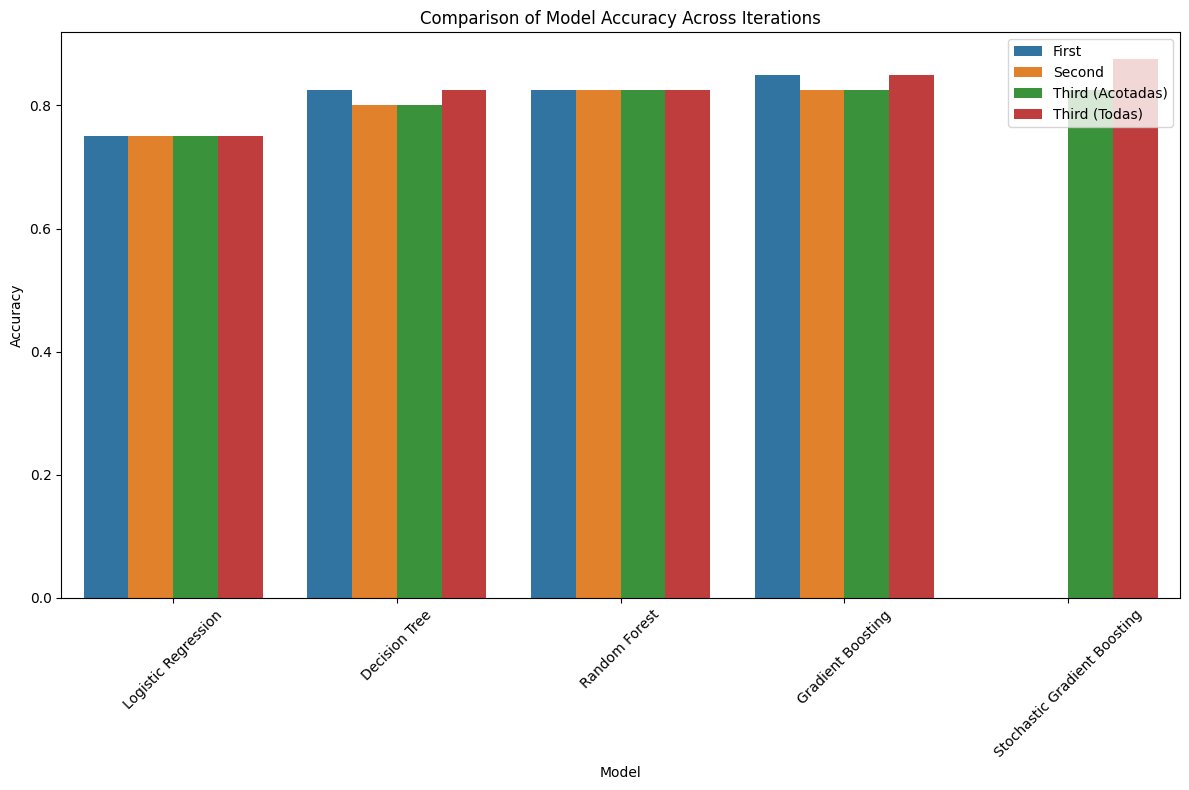

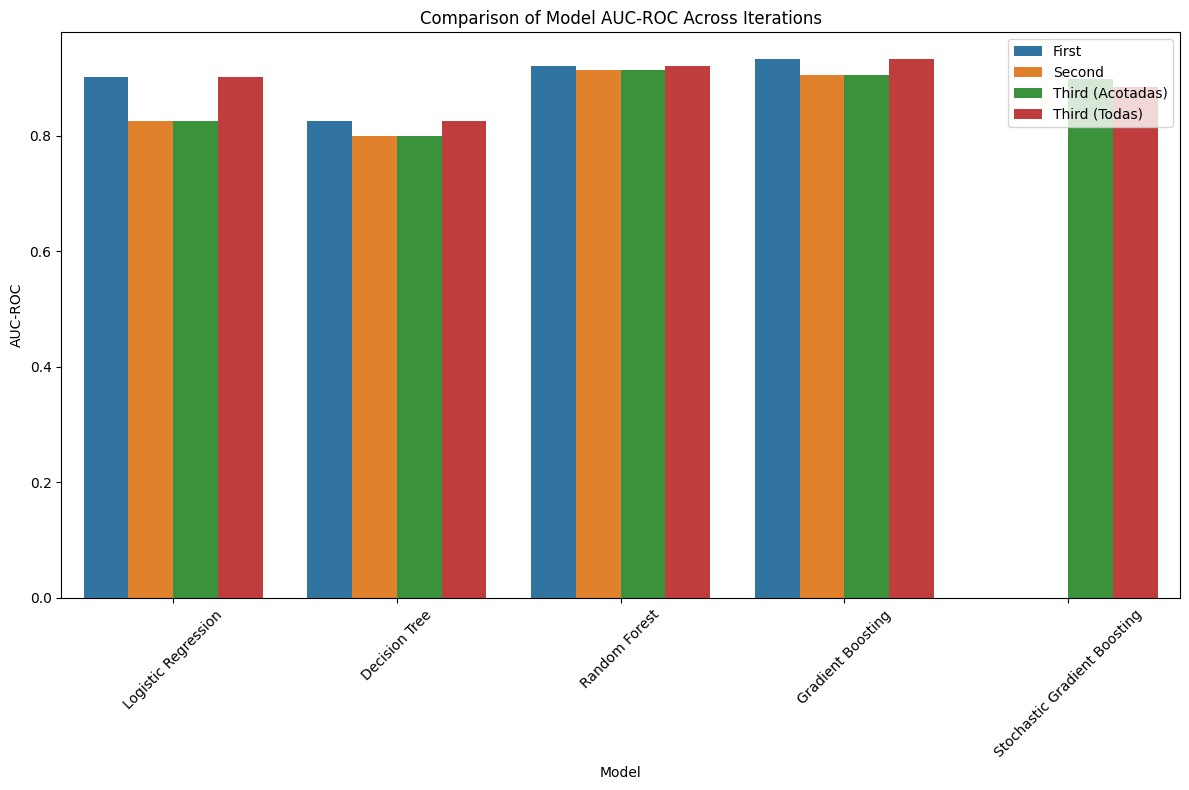

In [ ]:
# Crear un gráfico de barras para Accuracy
plt.figure(figsize=(12, 8))
sns.barplot(x="Model", y="Accuracy", hue="Iteration", data=df_comparativo)
plt.title("Comparison of Model Accuracy Across Iterations")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig("model_accuracy_comparison.png")
plt.show()

# Crear un gráfico de barras para AUC-ROC
plt.figure(figsize=(12, 8))
sns.barplot(x="Model", y="AUC-ROC", hue="Iteration", data=df_comparativo)
plt.title("Comparison of Model AUC-ROC Across Iterations")
plt.ylabel("AUC-ROC")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig("model_auc_roc_comparison.png")
plt.show()

In [ ]:
import numpy as np
from sklearn.ensemble import StackingClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


X = data.drop('FRAUD_LABEL', axis=1)
y = data['FRAUD_LABEL']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Base Estimators
lr = LogisticRegression(max_iter=10000)
dt = DecisionTreeClassifier(max_depth=10, random_state=42)
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Final Estimator
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42, subsample=0.8)

# Stacking Ensemble
stack = StackingClassifier(estimators=[
    ('lr', lr),
    ('dt', dt),
    ('rf', rf)
], final_estimator=gb)

# Fit model
stack.fit(X_train, y_train)

# Predicciones en test
y_pred = stack.predict(X_test)

# Evaluacion del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Stacking with Stochastic Gradient Boosting: {accuracy:.4f}')

Accuracy of Stacking with Stochastic Gradient Boosting: 0.9250


In [ ]:
import numpy as np
from sklearn.ensemble import StackingClassifier, GradientBoostingClassifier, RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

X = data.drop('FRAUD_LABEL', axis=1)
y = data['FRAUD_LABEL']

# SplitData
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Base Estimators - Adding diversity (SVM)
lr = LogisticRegression(max_iter=10000)
dt = DecisionTreeClassifier(max_depth=10, random_state=42)
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
svm = SVC(probability=True)

# Final Estimator - Alternative Algorithm
hgb = HistGradientBoostingClassifier(random_state=42)

# Stacking Ensemble
stack = StackingClassifier(estimators=[
    ('lr', lr),
    ('dt', dt),
    ('rf', rf),
    ('svm', svm)
], final_estimator=hgb)

# Hyperparameter Tuning (gridSearchCV for randomForest)
param_grid = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [5, 10, 15],
}
grid = GridSearchCV(estimator=stack, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)
print(f"Best parameters: {grid.best_params_}")

# Predicciones
y_pred = grid.predict(X_test)

# Evaluacion
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Stacking: {accuracy:.4f}')


Best parameters: {'rf__max_depth': 10, 'rf__n_estimators': 50}
Accuracy of Stacking: 0.9750


In [ ]:
import numpy as np
from sklearn.ensemble import StackingClassifier, GradientBoostingClassifier, RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score


X = data.drop('FRAUD_LABEL', axis=1)
y = data['FRAUD_LABEL']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Base Estimators - Adding diversity (SVM)
lr = LogisticRegression(max_iter=10000)
dt = DecisionTreeClassifier(max_depth=10, random_state=42)
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
svm = SVC(probability=True)

# Final Estimator - Alternative Algorithm
hgb = HistGradientBoostingClassifier(random_state=42)

# Stacking Ensemble
stack = StackingClassifier(estimators=[
    ('lr', lr),
    ('dt', dt),
    ('rf', rf),
    ('svm', svm)
], final_estimator=hgb)
###############################################
# Hyperparameter Tuning - Wider Parameter Grid
param_grid = {
    'rf__n_estimators': [25, 50, 100, 200],
    'rf__max_depth': [None, 5, 10, 15, 20],  # None for unlimited depth
}
##############################################
grid = GridSearchCV(estimator=stack, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)
print(f"Best parameters: {grid.best_params_}")

# Predicciones
y_pred = grid.predict(X_test)

# Evaluaciones
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Stacking: {accuracy:.4f}')



Best parameters: {'rf__max_depth': 5, 'rf__n_estimators': 25}
Accuracy of Stacking: 0.9750


##### Adding metrics

Best parameters: {'rf__max_depth': 10, 'rf__n_estimators': 50}
AUC of Stacking: 1.0000


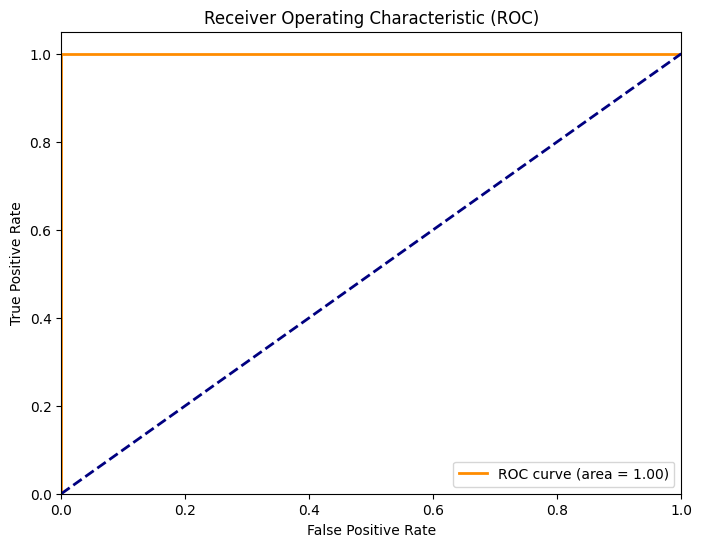

Accuracy of Stacking: 0.9750


In [ ]:
import numpy as np
from sklearn.ensemble import StackingClassifier, GradientBoostingClassifier, RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt


X = data.drop('FRAUD_LABEL', axis=1)
y = data['FRAUD_LABEL']


# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Base Estimators - Adding diversity (SVM)
lr = LogisticRegression(max_iter=10000)
dt = DecisionTreeClassifier(max_depth=10, random_state=42)
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
svm = SVC(probability=True)

# Final Estimator - Alternative Algorithm
hgb = HistGradientBoostingClassifier(random_state=42)

# Stacking Ensemble
stack = StackingClassifier(estimators=[
    ('lr', lr),
    ('dt', dt),
    ('rf', rf),
    ('svm', svm)
], final_estimator=hgb)
###############################################
# Hyperparameter Tuning - Wider Parameter Grid
param_grid = {
    'rf__n_estimators': [25, 50, 100, 200],
    'rf__max_depth': [None, 5, 10, 15, 20],  # None for unlimited depth
}
##############################################


#########################################

grid = GridSearchCV(estimator=stack, param_grid=param_grid, cv=5, scoring='roc_auc')
grid.fit(X_train, y_train)
print(f"Best parameters: {grid.best_params_}")

# Predicciones en Test Set - Probabilities for ROC Curve
y_prob = grid.predict_proba(X_test)[:, 1]

# Evaluacion (AUC-ROC)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print(f'AUC of Stacking: {roc_auc:.4f}')

# Plotting ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Predicciones en Test - Classes
y_pred = grid.predict(X_test)

# Evaluacion (Accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Stacking: {accuracy:.4f}')

-----------------------------------------
Encoded FRAUD_LABEL: 0, Category: False
Encoded FRAUD_LABEL: 1, Category: True
-----------------------------------------
Best parameters: {'rf__max_depth': None, 'rf__n_estimators': 200}
Accuracy: 1.0000
Precision (Class 0): 1.0000
Recall (Class 0): 1.0000
F1-Score (Class 0): 1.0000
Precision (Class 1): 1.0000
Recall (Class 1): 1.0000
F1-Score (Class 1): 1.0000
AUC-ROC: 1.0000
Elapsed Time (seconds): 155.7129


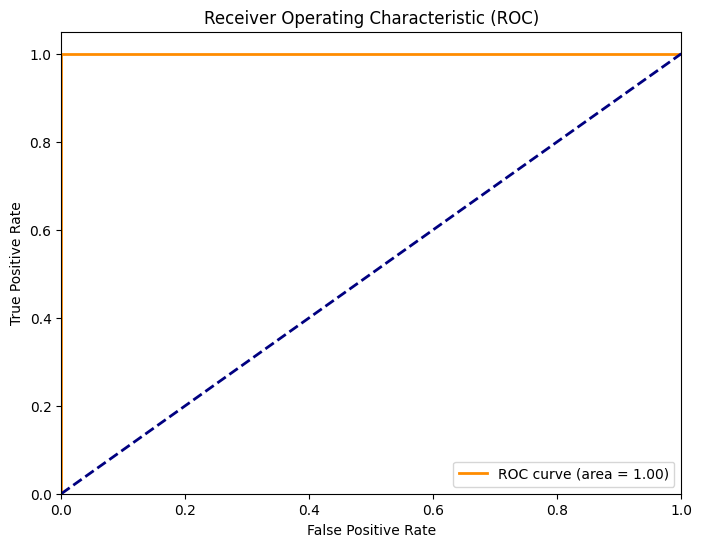

Accuracy of Stacking: 1.0000


In [ ]:
import numpy as np
import time
from sklearn.ensemble import StackingClassifier, HistGradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_curve, auc, classification_report

data = pd.read_excel('/content/drive/MyDrive/Final Seminario/medicaldata.xlsx')

def valueCat(categorie, lEncoders):

    encoder = lEncoders[categorie]


    categories = encoder.classes_
    print('-----------------------------------------')
    for i, category in enumerate(categories):
        encoded_value = encoder.transform([category])[0]
        print(f"Encoded {categorie}: {encoded_value}, Category: {category}")
    print('-----------------------------------------')

encodedCol = ['FRAUD_LABEL']
label_encoders = {}

for col in encodedCol:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

valueCat('FRAUD_LABEL', label_encoders)

X = data.drop('FRAUD_LABEL', axis=1)
y = data['FRAUD_LABEL']


# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Base Estimators - Adding diversity (SVM)
lr = LogisticRegression(max_iter=10000)
dt = DecisionTreeClassifier(max_depth=10, random_state=42)
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
svm = SVC(probability=True)

# Final Estimator - Alternative Algorithm
hgb = HistGradientBoostingClassifier(random_state=42)

# Stacking Ensemble
stack = StackingClassifier(estimators=[
    ('lr', LogisticRegression(max_iter=10000)),
    ('dt', DecisionTreeClassifier(max_depth=10, random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)),
    ('svm', SVC(probability=True))
], final_estimator=HistGradientBoostingClassifier(random_state=42))

# Hyperparameter Tuning - Wider Parameter Grid
param_grid = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [None, 10, 15]
}

# Record start time
start_time = time.time()

grid = GridSearchCV(estimator=stack, param_grid=param_grid, cv=5, scoring='roc_auc')
grid.fit(X_train, y_train)
print(f"Best parameters: {grid.best_params_}")

# Predictions on Test Set
y_pred = grid.predict(X_test)
y_prob = grid.predict_proba(X_test)[:, 1]

# Calculate Metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = auc(fpr, tpr)

# Record end time and calculate elapsed time
end_time = time.time()
elapsed_time = end_time - start_time

# Print Metrics
metrics = {
    'Accuracy': accuracy,
    'Precision (Class 0)': report['0']['precision'],
    'Recall (Class 0)': report['0']['recall'],
    'F1-Score (Class 0)': report['0']['f1-score'],
    'Precision (Class 1)': report['1']['precision'],
    'Recall (Class 1)': report['1']['recall'],
    'F1-Score (Class 1)': report['1']['f1-score'],
    'AUC-ROC': auc,
    'Elapsed Time (seconds)': elapsed_time
}

for metric, value in metrics.items():
    print(f'{metric}: {value:.4f}')

# Plotting ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Predictions on Test Set - Classes (if you still need accuracy)
y_pred = grid.predict(X_test)

# Evaluate the model (Accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Stacking: {accuracy:.4f}')

-----------------------------------------
Encoded FRAUD_LABEL: 0, Category: False
Encoded FRAUD_LABEL: 1, Category: True
-----------------------------------------
Best parameters: {'rf__max_depth': 15, 'rf__n_estimators': 100}
Accuracy: 1.0000
Precision (Class 0): 1.0000
Recall (Class 0): 1.0000
F1-Score (Class 0): 1.0000
Precision (Class 1): 1.0000
Recall (Class 1): 1.0000
F1-Score (Class 1): 1.0000
AUC-ROC: 1.0000
Elapsed Time (seconds): 152.8609


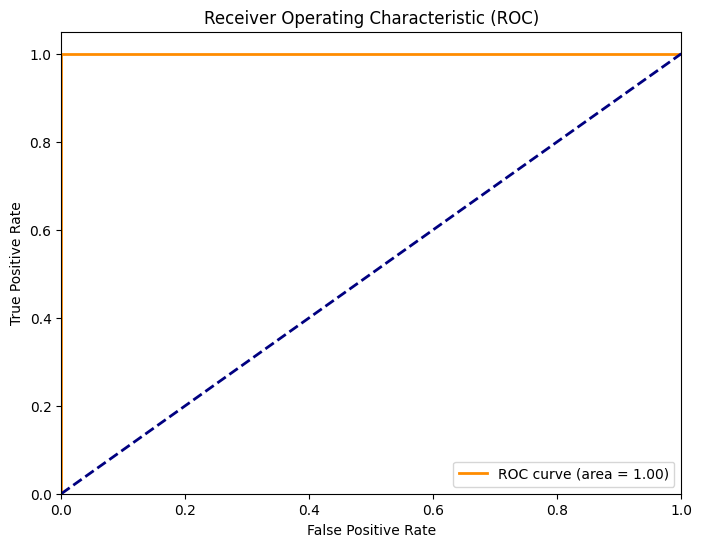

Accuracy of Stacking: 1.0000


In [ ]:


import numpy as np
import time
from sklearn.ensemble import StackingClassifier, HistGradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_curve, auc, classification_report

data = pd.read_excel('/content/drive/MyDrive/Final Seminario/medicaldata.xlsx')

def valueCat(categorie, lEncoders):

    encoder = lEncoders[categorie]


    categories = encoder.classes_
    print('-----------------------------------------')
    for i, category in enumerate(categories):
        encoded_value = encoder.transform([category])[0]
        print(f"Encoded {categorie}: {encoded_value}, Category: {category}")
    print('-----------------------------------------')

encodedCol = ['FRAUD_LABEL']
label_encoders = {}

for col in encodedCol:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

valueCat('FRAUD_LABEL', label_encoders)

X = data.drop('FRAUD_LABEL', axis=1)
y = data['FRAUD_LABEL']


# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Base Estimators - Adding diversity (SVM)
lr = LogisticRegression(max_iter=10000)
dt = DecisionTreeClassifier(max_depth=10, random_state=42)
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
svm = SVC(probability=True)

# Final Estimator - Alternative Algorithm
hgb = HistGradientBoostingClassifier(random_state=42)

# Stacking Ensemble
stack = StackingClassifier(estimators=[
    ('lr', LogisticRegression(max_iter=10000)),
    ('dt', DecisionTreeClassifier(max_depth=10, random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)),
    ('svm', SVC(probability=True))
], final_estimator=HistGradientBoostingClassifier(random_state=42))

# Hyperparameter Tuning - Wider Parameter Grid
param_grid = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [5, 10, 15],
}

# Record start time
start_time = time.time()

grid = GridSearchCV(estimator=stack, param_grid=param_grid, cv=5, scoring='roc_auc')
grid.fit(X_train, y_train)
print(f"Best parameters: {grid.best_params_}")

# Predictions on Test Set
y_pred = grid.predict(X_test)
y_prob = grid.predict_proba(X_test)[:, 1]

# Calculate Metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = auc(fpr, tpr)

# Record end time and calculate elapsed time
end_time = time.time()
elapsed_time = end_time - start_time

# Print Metrics
metrics = {
    'Accuracy': accuracy,
    'Precision (Class 0)': report['0']['precision'],
    'Recall (Class 0)': report['0']['recall'],
    'F1-Score (Class 0)': report['0']['f1-score'],
    'Precision (Class 1)': report['1']['precision'],
    'Recall (Class 1)': report['1']['recall'],
    'F1-Score (Class 1)': report['1']['f1-score'],
    'AUC-ROC': auc,
    'Elapsed Time (seconds)': elapsed_time
}

for metric, value in metrics.items():
    print(f'{metric}: {value:.4f}')

# Plotting ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Predictions on Test Set - Classes (if you still need accuracy)
y_pred = grid.predict(X_test)

# Evaluate the model (Accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Stacking: {accuracy:.4f}')


-----------------------------------------
Encoded FRAUD_LABEL: 0, Category: False
Encoded FRAUD_LABEL: 1, Category: True
-----------------------------------------
Best parameters: {'final_estimator__l2_regularization': 1, 'lr__C': 1, 'rf__max_depth': None, 'rf__min_samples_split': 2, 'rf__n_estimators': 50, 'svm__C': 1}
Accuracy: 0.9750
Precision (Class 0): 0.9545
Recall (Class 0): 1.0000
F1-Score (Class 0): 0.9767
Precision (Class 1): 1.0000
Recall (Class 1): 0.9474
F1-Score (Class 1): 0.9730
AUC-ROC: 1.0000
Elapsed Time (seconds): 12000.4788


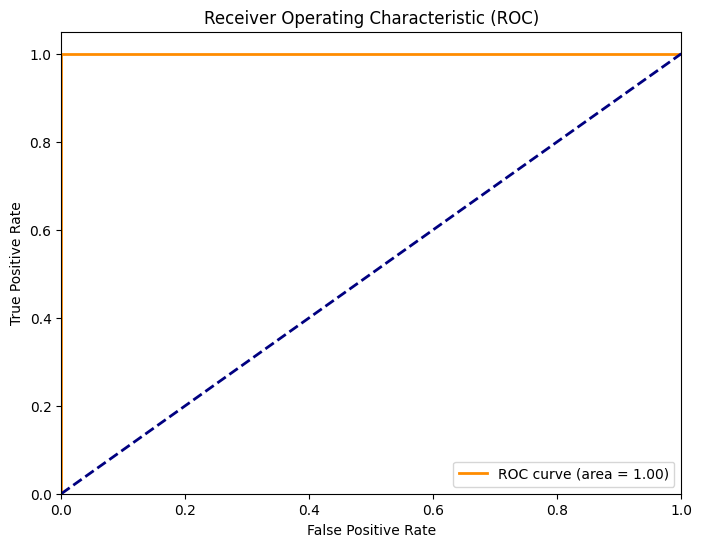

Accuracy of Stacking: 0.9750


In [ ]:
import numpy as np
import time
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import StackingClassifier, HistGradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_curve, auc, classification_report
import matplotlib.pyplot as plt


data = pd.read_excel('/content/drive/MyDrive/Final Seminario/medicaldata.xlsx')

def valueCat(categorie, lEncoders):

    encoder = lEncoders[categorie]


    categories = encoder.classes_
    print('-----------------------------------------')
    for i, category in enumerate(categories):
        encoded_value = encoder.transform([category])[0]
        print(f"Encoded {categorie}: {encoded_value}, Category: {category}")
    print('-----------------------------------------')

encodedCol = ['FRAUD_LABEL']
label_encoders = {}

for col in encodedCol:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

valueCat('FRAUD_LABEL', label_encoders)

X = data.drop('FRAUD_LABEL', axis=1)
y = data['FRAUD_LABEL']


# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Base Estimators - Adding diversity (SVM) with regularization
lr = LogisticRegression(max_iter=10000, penalty='l2', C=1.0)  # L2 regularization (Ridge)
dt = DecisionTreeClassifier(max_depth=5, random_state=42)      # Reduced max_depth for regularization
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42, max_features= 'sqrt') # Reduced max_depth and added max_features
svm = SVC(probability=True, C=1.0)  # C=1.0 for regularization

# Final Estimator - Alternative Algorithm with regularization
hgb = HistGradientBoostingClassifier(random_state=42, l2_regularization=0.1)

# Stacking Ensemble
stack = StackingClassifier(estimators=[
    ('lr', lr),
    ('dt', dt),
    ('rf', rf),
    ('svm', svm)
], final_estimator=hgb)

# Hyperparameter Tuning - Wider Parameter Grid with regularization parameters
param_grid = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [None, 5, 10],
    'rf__min_samples_split': [2, 5, 10],  # Added for RandomForest regularization
    'lr__C': [0.1, 1, 10],               # Added for LogisticRegression regularization
    'svm__C': [0.1, 1, 10],               # Added for SVM regularization
    'final_estimator__l2_regularization': [0.01, 0.1, 1],  # Added for HGBoost regularization
}

# Record start time
start_time = time.time()

grid = GridSearchCV(estimator=stack, param_grid=param_grid, cv=5, scoring='roc_auc')
grid.fit(X_train, y_train)
print(f"Best parameters: {grid.best_params_}")

# Predictions on Test Set
y_pred = grid.predict(X_test)
y_prob = grid.predict_proba(X_test)[:, 1]

# Calculate Metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = auc(fpr, tpr)

# Record end time and calculate elapsed time
end_time = time.time()
elapsed_time = end_time - start_time

# Print Metrics
metrics = {
    'Accuracy': accuracy,
    'Precision (Class 0)': report['0']['precision'],
    'Recall (Class 0)': report['0']['recall'],
    'F1-Score (Class 0)': report['0']['f1-score'],
    'Precision (Class 1)': report['1']['precision'],
    'Recall (Class 1)': report['1']['recall'],
    'F1-Score (Class 1)': report['1']['f1-score'],
    'AUC-ROC': auc,
    'Elapsed Time (seconds)': elapsed_time
}

for metric, value in metrics.items():
    print(f'{metric}: {value:.4f}')

# Plotting ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Predictions on Test Set - Classes (if you still need accuracy)
y_pred = grid.predict(X_test)

# Evaluate the model (Accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Stacking: {accuracy:.4f}')


-----------------------------------------
Encoded FRAUD_LABEL: 0, Category: False
Encoded FRAUD_LABEL: 1, Category: True
-----------------------------------------
Cross-Validation Results:
Mean Roc_auc: 0.9819
Mean Accuracy: 0.9542
Mean Precision: 0.9478
Mean Recall: 0.9667
Mean F1: 0.9553

Final Test Results:
Accuracy: 0.8750
AUC-ROC: 0.9700
              precision    recall  f1-score   support

           0       0.89      0.85      0.87        20
           1       0.86      0.90      0.88        20

    accuracy                           0.88        40
   macro avg       0.88      0.88      0.87        40
weighted avg       0.88      0.88      0.87        40


Elapsed Time (seconds): 49.3819


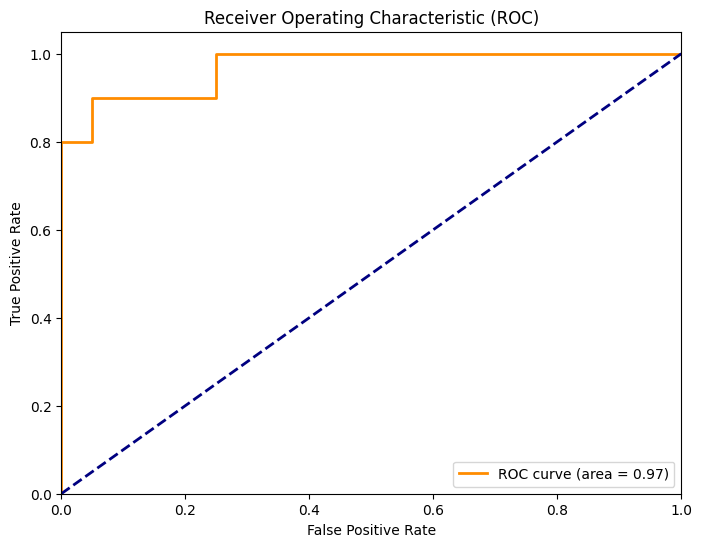

In [ ]:
import numpy as np
import time
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import StackingClassifier, HistGradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier  # Import explicitly
from sklearn.model_selection import RepeatedStratifiedKFold, cross_validate, train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

#######


data = pd.read_excel('/content/drive/MyDrive/Final Seminario/medicaldata.xlsx') #REEMPLAZAR X EL PATH CORRESPONDIENTE

#######

def valueCat(categorie, lEncoders):

    encoder = lEncoders[categorie]


    categories = encoder.classes_
    print('-----------------------------------------')
    for i, category in enumerate(categories):
        encoded_value = encoder.transform([category])[0]
        print(f"Encoded {categorie}: {encoded_value}, Category: {category}")
    print('-----------------------------------------')


# Label encode the target variable 'FRAUD_LABEL'
encodedCol = ['FRAUD_LABEL']
label_encoders = {}

for col in encodedCol:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

valueCat('FRAUD_LABEL', label_encoders)

# Separate features (X) and target (y)
X = data.drop('FRAUD_LABEL', axis=1)
y = data['FRAUD_LABEL']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Base Estimators - Simple and Regularized
lr = LogisticRegression(max_iter=10000, penalty='l2', C=1.0)
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
rf = RandomForestClassifier(n_estimators=50, max_depth=3, random_state=42)

# Final Estimator - Regularized
hgb = HistGradientBoostingClassifier(random_state=42, max_iter=50, l2_regularization=0.1)

# Stacking Ensemble
stack = StackingClassifier(estimators=[
    ('lr', lr),
    ('dt', dt),
    ('rf', rf),
], final_estimator=hgb)

# Hyperparameter Tuning
param_grid = {
    'rf__max_depth': [2, 3],
    'lr__C': [0.5, 1.0],
    'final_estimator__max_iter': [30, 50],
}

# Record start time
start_time = time.time()

# Repeated Cross-Validation (for robust evaluation)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)
scoring = ['roc_auc', 'accuracy', 'precision', 'recall', 'f1']

# Fit the model and obtain cross-validation scores
scores = cross_validate(stack, X_train, y_train, scoring=scoring, cv=cv, n_jobs=-1)

# Print Average Cross-Validation Scores
print("Cross-Validation Results:")
for metric in scoring:
    print(f"Mean {metric.capitalize()}: {np.mean(scores[f'test_{metric}']):.4f}")

# Fit on all training data using best parameters
stack.fit(X_train, y_train)

# Prediction and Evaluation
y_pred = stack.predict(X_test)
y_prob = stack.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print("\nFinal Test Results:")
print(f'Accuracy: {accuracy:.4f}')
print(f'AUC-ROC: {roc_auc:.4f}')
print(report)

# Record end time and calculate elapsed time
end_time = time.time()
elapsed_time = end_time - start_time
print(f'\nElapsed Time (seconds): {elapsed_time:.4f}')

# Plotting ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


In [ ]:
import pandas as pd
import time
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.metrics import mean_squared_error, r2_score, classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve

import numpy as np
import time
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import StackingClassifier, HistGradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier  # Import explicitly
from sklearn.model_selection import RepeatedStratifiedKFold, cross_validate, train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

#######!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

data = pd.read_excel('/content/drive/MyDrive/Final Seminario/medicaldata.xlsx') #REEMPLAZAR X EL PATH CORRESPONDIENTE

#######!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

def valueCat(categorie, lEncoders):

    encoder = lEncoders[categorie]


    categories = encoder.classes_
    print('-----------------------------------------')
    for i, category in enumerate(categories):
        encoded_value = encoder.transform([category])[0]
        print(f"Encoded {categorie}: {encoded_value}, Category: {category}")
    print('-----------------------------------------')


# Label encode the target variable 'FRAUD_LABEL'
encodedCol = ['FRAUD_LABEL']
label_encoders = {}

for col in encodedCol:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

valueCat('FRAUD_LABEL', label_encoders)

# Separate features (X) and target (y)
X = data.drop('FRAUD_LABEL', axis=1)
y = data['FRAUD_LABEL']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Base Estimators - Simple and Regularized
lr = LogisticRegression(max_iter=10000, penalty='l2', C=1.0)
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
rf = RandomForestClassifier(n_estimators=50, max_depth=3, random_state=42)

# Final Estimator - Regularized
hgb = HistGradientBoostingClassifier(random_state=42, max_iter=50, l2_regularization=0.1)

# Stacking Ensemble
stack = StackingClassifier(estimators=[
    ('lr', lr),
    ('dt', dt),
    ('rf', rf),
], final_estimator=hgb)

# Hyperparameter Tuning
param_grid = {
    'rf__max_depth': [2, 3],
    'lr__C': [0.5, 1.0],
    'final_estimator__max_iter': [30, 50],
}

# Record start time
start_time = time.time()

# Repeated Cross-Validation (for robust evaluation)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)
scoring = ['roc_auc', 'accuracy', 'precision', 'recall', 'f1']

# Fit the model and obtain cross-validation scores
scores = cross_validate(stack, X_train, y_train, scoring=scoring, cv=cv, n_jobs=-1)

# Print Average Cross-Validation Scores
print("Cross-Validation Results:")
for metric in scoring:
    print(f"Mean {metric.capitalize()}: {np.mean(scores[f'test_{metric}']):.4f}")

# Fit on all training data using best parameters
stack.fit(X_train, y_train)

# Prediction and Evaluation
y_pred = stack.predict(X_test)
y_prob = stack.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print("\nFinal Test Results:")
print(f'Accuracy: {accuracy:.4f}')
print(f'AUC-ROC: {roc_auc:.4f}')
print(report)

# Record end time and calculate elapsed time
end_time = time.time()
elapsed_time = end_time - start_time
print(f'\nElapsed Time (seconds): {elapsed_time:.4f}')

# Plotting ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()
